# <font color='green'>Import Libraries</font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import *
from tabulate import tabulate

In [2]:
pd.options.display.max_rows = 40000 # To accomodate the number of rows in the data set

pd.options.display.float_format = '{:20,.2f}'.format # To display pub_rec_bankruptcies data in a readable format

# <font color='green'>Read Data</font>

In [3]:
loan = pd.read_csv("loan.csv", low_memory=False)

# <font color='green'>Data Understanding</font>

In [4]:
loan.size

4408587

In [5]:
loan.shape

(39717, 111)

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
loan.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [8]:
loan.describe()

id            member_id            loan_amnt  \
count            39,717.00            39,717.00            39,717.00   
mean            683,131.91           850,463.56            11,219.44   
std             210,694.13           265,678.31             7,456.67   
min              54,734.00            70,699.00               500.00   
25%             516,221.00           666,780.00             5,500.00   
50%             665,665.00           850,812.00            10,000.00   
75%             837,755.00         1,047,339.00            15,000.00   
max           1,077,501.00         1,314,167.00            35,000.00   

               funded_amnt      funded_amnt_inv          installment  \
count            39,717.00            39,717.00            39,717.00   
mean             10,947.71            10,397.45               324.56   
std               7,187.24             7,128.45               208.87   
min                 500.00                 0.00                15.69   
25%               5,400.00             5,000.00               167.02   
50%               9,600.00             8,975.00               280.22   
75%              15,000.00            14,400.00               430.78   
max              35,000.00            35,000.00             1,305.19   

                annual_inc                  dti          delinq_2yrs  \
count            39,717.00            39,717.00            39,717.00   
mean             68,968.93                13.32                 0.15   
std              63,793.77                 6.68                 0.49   
min               4,000.00                 0.00                 0.00   
25%              40,404.00                 8.17                 0.00   
50%              59,000.00                13.40                 0.00   
75%              82,300.00                18.60                 0.00   
max           6,000,000.00                29.99                11.00   

            inq_last_6mths             ...               num_tl_90g_dpd_24m  \
count            39,717.00             ...                             0.00   
mean                  0.87             ...                              nan   
std                   1.07             ...                              nan   
min                   0.00             ...                              nan   
25%                   0.00             ...                              nan   
50%                   1.00             ...                              nan   
75%                   1.00             ...                              nan   
max                   8.00             ...                              nan   

        num_tl_op_past_12m       pct_tl_nvr_dlq     percent_bc_gt_75  \
count                 0.00                 0.00                 0.00   
mean                   nan                  nan                  nan   
std                    nan                  nan                  nan   
min                    nan                  nan                  nan   
25%                    nan                  nan                  nan   
50%                    nan                  nan                  nan   
75%                    nan                  nan                  nan   
max                    nan                  nan                  nan   

       pub_rec_bankruptcies            tax_liens      tot_hi_cred_lim  \
count             39,020.00            39,678.00                 0.00   
mean                   0.04                 0.00                  nan   
std                    0.20                 0.00                  nan   
min                    0.00                 0.00                  nan   
25%                    0.00                 0.00                  nan   
50%                    0.00                 0.00                  nan   
75%                    0.00                 0.00                  nan   
max                    2.00                 0.00                  nan   

         total_bal_ex_mort       total_bc_limit  total_il_

In [9]:
loan.head()

id  member_id  loan_amnt  funded_amnt      funded_amnt_inv  \
0  1077501    1296599       5000         5000             4,975.00   
1  1077430    1314167       2500         2500             2,500.00   
2  1077175    1313524       2400         2400             2,400.00   
3  1076863    1277178      10000        10000            10,000.00   
4  1075358    1311748       3000         3000             3,000.00   

         term int_rate          installment grade sub_grade  \
0   36 months   10.65%               162.87     B        B2   
1   60 months   15.27%                59.83     C        C4   
2   36 months   15.96%                84.33     C        C5   
3   36 months   13.49%               339.31     C        C1   
4   60 months   12.69%                67.79     B        B5   

             ...               num_tl_90g_dpd_24m   num_tl_op_past_12m  \
0            ...                              nan                  nan   
1            ...                              nan                  nan   
2            ...                              nan                  nan   
3            ...                              nan                  nan   
4            ...                              nan                  nan   

        pct_tl_nvr_dlq     percent_bc_gt_75 pub_rec_bankruptcies  \
0                  nan                  nan                 0.00   
1                  nan                  nan                 0.00   
2                  nan                  nan                 0.00   
3                  nan                  nan                 0.00   
4                  nan                  nan                 0.00   

             tax_liens      tot_hi_cred_lim    total_bal_ex_mort  \
0                 0.00                  nan                  nan   
1                 0.00                  nan                  nan   
2                 0.00                  nan                  nan   
3                 0.00                  nan                  nan   
4                 0.00                  nan                  nan   

        total_bc_limit total_il_high_credit_limit  
0                  nan                        nan  
1                  nan                        nan  
2                  nan                        nan  
3                  nan                        nan  
4                  nan                        nan  

[5 rows x 111 columns]

# <font color='green'>Filtering for target data</font>

In [10]:
loan['loan_status'].value_counts(dropna=False).sort_values(ascending = False)

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

Considering charged off and fully paid data only as they are the ones that are important for our analysis. Current loans are ongoing ones and we can't infer much from them.

In [11]:
loan = loan.loc[loan['loan_status'] != 'Current']

In [12]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.0+ MB


# <font color='green'>Dropping Full Null Columns</font>

There are 55 columns in the data set that have all values as null. Since, they are of no use for the analysis, proceeding with dropping them.

In [13]:
loan_isnull = pd.DataFrame(loan.isnull().sum(axis=0), columns=['NullCount'])

drop_full_null_columns = list(loan_isnull.loc[loan_isnull['NullCount']==len(loan.index)].index)

print('Columns which have all Nulls => \n\n' + str(drop_full_null_columns))

loan.drop(drop_full_null_columns, axis=1, inplace=True)

print('\n\nRemaining Columns => ' + str(len(loan.columns)))

Columns which have all Nulls => 

['next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_

# <font color='green'>Column Value Counts</font>

Finding the distinct value counts/frequencies of each column to determine if there are any columns with only a single value.

In [14]:
pd.DataFrame(loan.apply(lambda x: len(x.value_counts()), axis=0), columns=['Value Count']).sort_values(by='Value Count', ascending=True)

Value Count
tax_liens                             1
initial_list_status                   1
out_prncp                             1
out_prncp_inv                         1
collections_12_mths_ex_med            1
policy_code                           1
pymnt_plan                            1
application_type                      1
acc_now_delinq                        1
chargeoff_within_12_mths              1
delinq_amnt                           1
loan_status                           2
term                                  2
verification_status                   3
pub_rec_bankruptcies                  3
home_ownership                        5
pub_rec                               5
grade                                 7
inq_last_6mths                        9
emp_length                           11
delinq_2yrs                          11
purpose                              14
sub_grade                            35
open_acc                             40
addr_state                           50
issue_d                              55
total_acc                            82
mths_since_last_delinq               95
last_pymnt_d                        101
last_credit_pull_d                  106
mths_since_last_record              111
int_rate                            370
earliest_cr_line                    524
zip_code                            822
loan_amnt                           870
funded_amnt                        1019
revol_util                         1088
total_rec_late_fee                 1320
collection_recovery_fee            2616
dti                                2853
recoveries                         4040
annual_inc                         5215
total_rec_prncp                    6841
funded_amnt_inv                    8050
installment                       15022
title                             19297
revol_bal                         21275
desc                              25803
emp_title                         28027
total_rec_int                     34025
last_pymnt_amnt                   34418
total_pymnt_inv                   36387
total_pymnt                       36714
url                               38577
member_id                         38577
id                                38577

# <font color='green'>Dropping Columns with Single Value</font>

There are 11 columns which have a single value in them. Since they are not useful for the analysis, proceeding with dropping them.

In [15]:
loan_single=loan.copy()

single_value_columns = pd.DataFrame(loan_single.apply(lambda x: len(x.value_counts()), axis=0), columns=['SingleValueColumn'])

drop_single_value_columns = list(single_value_columns.loc[single_value_columns['SingleValueColumn']==1].index)

print('Columns which have just a single value => \n\n' + str(drop_single_value_columns))

loan.drop(drop_single_value_columns, axis=1, inplace=True)

print('\n\nRemaining Columns => ' + str(len(loan.columns)))

Columns which have just a single value => 

['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


Remaining Columns => 45


# <font color='green'>Dropping Columns with All Different Values</font>

There are 3 columns that have all values different. Since they are not useful for the analysis, proceeding with dropping them.

In [16]:
loan_diff=loan.copy()

alldiff_value_columns = pd.DataFrame(loan_diff.apply(lambda x: len(x.value_counts()), axis=0), columns=['AllDiffValueColumn'])

drop_alldiff_value_columns = list(alldiff_value_columns.loc[alldiff_value_columns['AllDiffValueColumn']==len(loan.index)].index)

print('Columns which have all values different => \n\n' + str(drop_alldiff_value_columns))

loan.drop(drop_alldiff_value_columns, axis=1, inplace=True)

print('Remaining Columns => ' + str(len(loan.columns)))

Columns which have all values different => 

['id', 'member_id', 'url']
Remaining Columns => 42


# <font color='green'>Dropping Columns with Significant Nulls</font>

In [17]:
# Percentage of nulls in each column

round(100*(loan.isnull().sum(axis=0)/len(loan.index)), 2).sort_values(ascending = False)

mths_since_last_record                   92.90
mths_since_last_delinq                   64.56
desc                                     32.47
emp_title                                 6.19
emp_length                                2.68
pub_rec_bankruptcies                      1.81
last_pymnt_d                              0.18
revol_util                                0.13
title                                     0.03
last_credit_pull_d                        0.01
int_rate                                  0.00
funded_amnt_inv                           0.00
funded_amnt                               0.00
loan_status                               0.00
issue_d                                   0.00
annual_inc                                0.00
verification_status                       0.00
installment                               0.00
home_ownership                            0.00
term                                      0.00
sub_grade                                 0.00
grade        

There are 3 columns which have significant amount of null values. Since they are not of much use to the analysis, proceeding with dropping them.

In [18]:
drop_null_cols = ['mths_since_last_record','mths_since_last_delinq','desc']

print('Columns which have significant nulls => \n\n' + str(drop_null_cols))

loan.drop(drop_null_cols, axis=1, inplace=True)

print('Remaining Columns => ' + str(len(loan.columns)))

Columns which have significant nulls => 

['mths_since_last_record', 'mths_since_last_delinq', 'desc']
Remaining Columns => 39


In [19]:
# Remaining Columns

list(loan.columns)

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'pub_rec_bankruptcies']

# <font color='green'>Dropping Columns that are Insignificant to the Analysis</font>

From our independent research of risk analytics and also through univariate analysis, we concluded that the below columns or attributes are not required for this analysis. Explanation for each is provided below.

__issue_d, earliest_cr_line, last_pymnt_d, last_credit_pull_d__
Insignificant since a month/day can't affect the loan being default or not.

__funded_amnt/funded_amnt_inv/installment__
These are after affect of finding the risky applications, meaning, the values of these would be higher for risky applications hence not useful for our analysis.

__total_pymnt/total_pymnt_inv/total_rec_prncp/total_rec_int/total_rec_late_fee/recoveries/collection_recovery_fee/last_pymnt_amnt__
These columns signify the loan recovery hence not useful to analysis.

__zip_code__
Already considering addr_state for geographic location. Hence, ignoring this.

__sub_grade/emp_title__
With univariate analysis, found that the significance of this on loan status is not much.

__title__
Title of the loan won't effect the loan status.

__total_acc__
We are considering open_acc which aptly represents the number of credit lines.

In [20]:
date_cols = ['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']

after_effect_cols = ['funded_amnt','funded_amnt_inv','installment']

received_cols = ['total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
                 'collection_recovery_fee','last_pymnt_amnt']

insig_cols = ['zip_code','sub_grade','emp_title','title','total_acc']

loan.drop(date_cols, axis=1, inplace=True)
loan.drop(after_effect_cols, axis=1, inplace=True)
loan.drop(received_cols, axis=1, inplace=True)
loan.drop(insig_cols, axis=1, inplace=True)

print('Remaining Columns => ' + str(len(loan.columns)))

list(loan.columns)

Remaining Columns => 19


['loan_amnt',
 'term',
 'int_rate',
 'grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'loan_status',
 'purpose',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'pub_rec_bankruptcies']

# <font color='green'>Data Understanding</font>

### General Info

In [21]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
loan_amnt               38577 non-null int64
term                    38577 non-null object
int_rate                38577 non-null object
grade                   38577 non-null object
emp_length              37544 non-null object
home_ownership          38577 non-null object
annual_inc              38577 non-null float64
verification_status     38577 non-null object
loan_status             38577 non-null object
purpose                 38577 non-null object
addr_state              38577 non-null object
dti                     38577 non-null float64
delinq_2yrs             38577 non-null int64
inq_last_6mths          38577 non-null int64
open_acc                38577 non-null int64
pub_rec                 38577 non-null int64
revol_bal               38577 non-null int64
revol_util              38527 non-null object
pub_rec_bankruptcies    37880 non-null float64
dtypes: float64(3), 

### Statistical Info

In [22]:
loan.describe()

loan_amnt           annual_inc                  dti  \
count            38,577.00            38,577.00            38,577.00   
mean             11,047.03            68,777.97                13.27   
std               7,348.44            64,218.68                 6.67   
min                 500.00             4,000.00                 0.00   
25%               5,300.00            40,000.00                 8.13   
50%               9,600.00            58,868.00                13.37   
75%              15,000.00            82,000.00                18.56   
max              35,000.00         6,000,000.00                29.99   

               delinq_2yrs       inq_last_6mths             open_acc  \
count            38,577.00            38,577.00            38,577.00   
mean                  0.15                 0.87                 9.28   
std                   0.49                 1.07                 4.40   
min                   0.00                 0.00                 2.00   
25%                   0.00                 0.00                 6.00   
50%                   0.00                 1.00                 9.00   
75%                   0.00                 1.00                12.00   
max                  11.00                 8.00                44.00   

                   pub_rec            revol_bal  pub_rec_bankruptcies  
count            38,577.00            38,577.00             37,880.00  
mean                  0.06            13,289.49                  0.04  
std                   0.24            15,866.49                  0.20  
min                   0.00                 0.00                  0.00  
25%                   0.00             3,650.00                  0.00  
50%                   0.00             8,762.00                  0.00  
75%                   0.00            16,912.00                  0.00  
max                   4.00           149,588.00                  2.00

### Data Glance

In [23]:
loan.head()

loan_amnt        term int_rate grade emp_length home_ownership  \
0       5000   36 months   10.65%     B  10+ years           RENT   
1       2500   60 months   15.27%     C   < 1 year           RENT   
2       2400   36 months   15.96%     C  10+ years           RENT   
3      10000   36 months   13.49%     C  10+ years           RENT   
5       5000   36 months    7.90%     A    3 years           RENT   

            annual_inc verification_status  loan_status         purpose  \
0            24,000.00            Verified   Fully Paid     credit_card   
1            30,000.00     Source Verified  Charged Off             car   
2            12,252.00        Not Verified   Fully Paid  small_business   
3            49,200.00     Source Verified   Fully Paid           other   
5            36,000.00     Source Verified   Fully Paid         wedding   

  addr_state                  dti  delinq_2yrs  inq_last_6mths  open_acc  \
0         AZ                27.65            0               1         3   
1         GA                 1.00            0               5         3   
2         IL                 8.72            0               2         2   
3         CA                20.00            0               1        10   
5         AZ                11.20            0               3         9   

   pub_rec  revol_bal revol_util  pub_rec_bankruptcies  
0        0      13648     83.70%                  0.00  
1        0       1687      9.40%                  0.00  
2        0       2956     98.50%                  0.00  
3        0       5598        21%                  0.00  
5        0       7963     28.30%                  0.00

### Column Wise Missing Value %

In [24]:
(round(100*(loan.isnull().sum(axis=0)/len(loan.index)), 2).sort_values(ascending = False))

emp_length                             2.68
pub_rec_bankruptcies                   1.81
revol_util                             0.13
loan_status                            0.00
term                                   0.00
int_rate                               0.00
grade                                  0.00
home_ownership                         0.00
annual_inc                             0.00
verification_status                    0.00
purpose                                0.00
addr_state                             0.00
dti                                    0.00
delinq_2yrs                            0.00
inq_last_6mths                         0.00
open_acc                               0.00
pub_rec                                0.00
revol_bal                              0.00
loan_amnt                              0.00
dtype: float64

### Data Quality Issue

Clearly, there are missing values in emp_length, pub_rec_bankruptcies & revol_util_percent columns. These will be handled in the subsequent section.

### Row Wise Missing Value %

In [25]:
(round(100*(loan.isnull().sum(axis=1)/len(loan.index)), 2).sort_values(ascending = False)).unique()

array([ 0.01,  0.  ])

### Rows with all column values null

In [26]:
loan.isnull().all(axis=1).sum()

0

### Rows with any column value null

In [27]:
loan.isnull().all(axis=0).sum()

0

### Count of unique values of all columns

In [28]:
loan.apply(lambda x: len(x.value_counts()), axis=0).sort_values(ascending = False)

revol_bal               21275
annual_inc               5215
dti                      2853
revol_util               1088
loan_amnt                 870
int_rate                  370
addr_state                 50
open_acc                   40
purpose                    14
delinq_2yrs                11
emp_length                 11
inq_last_6mths              9
grade                       7
home_ownership              5
pub_rec                     5
verification_status         3
pub_rec_bankruptcies        3
loan_status                 2
term                        2
dtype: int64

# <font color='green'>Data Standardization</font>

### int_rate

Removing the % symbol from the value and converting to numeric value

In [29]:
loan['int_rate'] = loan['int_rate'].apply(lambda x: str(x).split('%')[0].strip())

loan.rename(columns={"int_rate":"int_rate_percent"}, inplace=True)

loan['int_rate_percent'] = loan['int_rate_percent'].astype('float64')

### revol_util

Removing the % symbol from the value and converting to numeric value

In [30]:
loan['revol_util'] = loan['revol_util'].apply(lambda x: str(x).split('%')[0].strip())

loan.rename(columns={"revol_util":"revol_util_percent"}, inplace=True)

loan['revol_util_percent'] = loan['revol_util_percent'].astype('float64')

# <font color='green'>Data Cleaning & Manipulation</font>

## Cleaning

In [31]:
# We observe that term column contains leading spaces, let's remove those

loan.term = loan.term.str.strip()

## Missing Value Imputation

### emp_length

Imputing the emp_length missing values with the string 'Missing'

In [32]:
loan.loc[pd.isnull(loan['emp_length']), ['emp_length']] = 'Missing'

### pub_rec_bankruptcies

In [33]:
loan['pub_rec_bankruptcies'].describe()

count              37,880.00
mean                    0.04
std                     0.20
min                     0.00
25%                     0.00
50%                     0.00
75%                     0.00
max                     2.00
Name: pub_rec_bankruptcies, dtype: float64

Taking IQR (75th percentile - 25th percentile) as the missing value

In [34]:
loan.loc[pd.isnull(loan['pub_rec_bankruptcies']), ['pub_rec_bankruptcies']] = 0.00

### revol_util_percent

In [35]:
loan['revol_util_percent'].describe()

count              38,527.00
mean                   48.70
std                    28.36
min                     0.00
25%                    25.20
50%                    49.10
75%                    72.30
max                    99.90
Name: revol_util_percent, dtype: float64

Taking IQR (75th percentile - 25th percentile) as the missing value

In [36]:
loan.loc[pd.isnull(loan['revol_util_percent']), ['revol_util_percent']] = 47.00

## Column Wise Missing Value %

In [37]:
round(100*(loan.isnull().sum(axis=0)/len(loan.index)), 2).sort_values(ascending = False)

pub_rec_bankruptcies                   0.00
loan_status                            0.00
term                                   0.00
int_rate_percent                       0.00
grade                                  0.00
emp_length                             0.00
home_ownership                         0.00
annual_inc                             0.00
verification_status                    0.00
purpose                                0.00
revol_util_percent                     0.00
addr_state                             0.00
dti                                    0.00
delinq_2yrs                            0.00
inq_last_6mths                         0.00
open_acc                               0.00
pub_rec                                0.00
revol_bal                              0.00
loan_amnt                              0.00
dtype: float64

Now, all the missing values have been taken care.

## Data Redundancy

### Count of duplicates

In [38]:
loan.duplicated().value_counts()

False    38577
dtype: int64

### Drop duplicates

In [39]:
loan.drop_duplicates(keep='first', inplace=True)

loan.duplicated().value_counts()

False    38577
dtype: int64

# <font color='green'>Choice of plots</font>

__Univariate Analysis__

Quantitative Variable => Box plot to see for outliers.

Unordered Categorical Variable => Count plot to see the frequency distribution.

Numerical Categorical Variable => Count plot & Distribution plot to see the frequency/density distribution.

__Segmented Univariate Analysis__

1 Categorical + 1 Quantitative Variable => Bar plots to see the mean and median values across the loan statuses.

1 Categorical + 1 Numeric Categorical Variable => Count plots to see the frequency distribution across the loan statuses.

2 Categorical => Bar plots with count/percent distributions to see the effect one variable on the other.

__Bivariate Analysis__

3 Categorical Variables => Bar plots with count/percent distributions to see the effect one variable on the other.

# <font color='green'>Univariate Analysis</font>

__Outlier Treatment__

For columns for which outliers are identified, they are treated considering the values between Q1-1.5xIQR & Q3+1.5xIQR where Q1 is 25th percentile and Q3 is 75th percentile and IQR is Q3-Q1.

## loan_amnt

In [40]:
print('\nNumber of unique values => ' + str(len(loan['loan_amnt'].unique())))
print('\n###############')
print('\nUnique values are => \n\n' + str(pd.Series(loan['loan_amnt'].unique()).sort_values(ascending=True)))
print('\n###############')
print('\nFrequency distribution of unique values => \n\n'+ str(loan['loan_amnt'].value_counts(dropna=False).sort_values(ascending = False)))


Number of unique values => 870

###############

Unique values are => 

856      500
859      700
857      725
863      750
865      800
862      900
860      950
11      1000
710     1050
817     1075
330     1100
823     1125
853     1150
185     1200
772     1225
583     1250
652     1275
325     1300
271     1325
716     1350
776     1375
96      1400
765     1425
320     1450
807     1475
89      1500
700     1525
514     1550
246     1600
651     1625
739     1650
777     1675
145     1700
563     1750
633     1775
99      1800
486     1825
585     1850
516     1875
538     1900
368     1925
294     1950
81      2000
479     2050
681     2075
54      2100
252     2125
734     2150
137     2200
745     2225
181     2250
672     2275
211     2300
725     2325
540     2350
784     2375
2       2400
202     2425
530     2450
750     2475
1       2500
743     2525
449     2550
249     2575
359     2600
131     2625
644     2650
556     2675
241     2700
678     2725
435     2750
753 

In [41]:
loan['loan_amnt'].describe()

count              38,577.00
mean               11,047.03
std                 7,348.44
min                   500.00
25%                 5,300.00
50%                 9,600.00
75%                15,000.00
max                35,000.00
Name: loan_amnt, dtype: float64

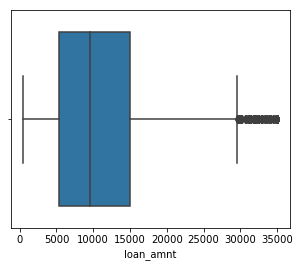

In [42]:
plt.figure(figsize=(5, 4))
sns.boxplot(loan['loan_amnt'])
plt.show()

In [43]:
#'''
#Outlier Treatment

Q1 = loan['loan_amnt'].quantile(0.25)
Q3 = loan['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1

print('IQR => ' + str(IQR))

fence_low  = Q1-1.5*IQR
print('fence_low => ' + str(fence_low))

fence_high = Q3+1.5*IQR
print('fence_high => ' + str(fence_high))

if fence_high > fence_low:
    loan = loan.loc[(loan['loan_amnt'] > fence_low) & (loan['loan_amnt'] < fence_high)]
#'''

IQR => 9700.0
fence_low => -9250.0
fence_high => 29550.0


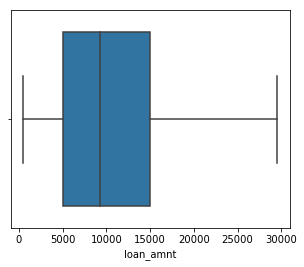

In [44]:
plt.figure(figsize=(5, 4))
sns.boxplot(loan['loan_amnt'])
plt.show()

In [45]:
loan['annual_inc'].describe()

count              37,488.00
mean               67,136.11
std                62,947.54
min                 4,000.00
25%                40,000.00
50%                57,200.00
75%                80,000.00
max             6,000,000.00
Name: annual_inc, dtype: float64

## int_rate_percent

In [46]:
print('\nNumber of unique values => ' + str(len(loan['int_rate_percent'].unique())))
print('\n###############')
print('\nUnique values are => \n\n' + str(pd.Series(loan['int_rate_percent'].unique()).sort_values(ascending=True)))
print('\n###############')
print('\nFrequency distribution of unique values => \n\n'+ str(loan['int_rate_percent'].value_counts(dropna=False).sort_values(ascending = False)))


Number of unique values => 370

###############

Unique values are => 

48                    5.42
112                   5.79
38                    5.99
34                    6.00
11                    6.03
131                   6.17
171                   6.39
132                   6.54
19                    6.62
170                   6.76
127                   6.91
113                   6.92
44                    6.99
225                   7.05
349                   7.12
173                   7.14
96                    7.29
249                   7.37
222                   7.40
74                    7.42
340                   7.43
36                    7.49
16                    7.51
108                   7.66
247                   7.68
202                   7.74
333                   7.75
160                   7.88
4                     7.90
73                    7.91
234                   8.00
339                   8.07
282                   8.32
334                   8.38
42       

In [47]:
loan['int_rate_percent'].describe()

count              37,488.00
mean                   11.82
std                     3.62
min                     5.42
25%                     8.90
50%                    11.71
75%                    14.27
max                    24.40
Name: int_rate_percent, dtype: float64

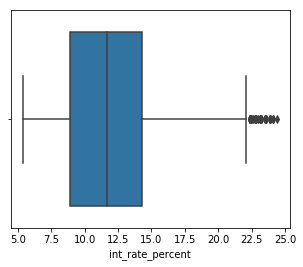

In [48]:
plt.figure(figsize=(5, 4))
sns.boxplot(loan['int_rate_percent'])
plt.show()

In [49]:
#'''

#Outlier Treatment

Q1 = loan['int_rate_percent'].quantile(0.25)
Q3 = loan['int_rate_percent'].quantile(0.75)
IQR = Q3 - Q1

print('IQR => ' + str(IQR))

fence_low  = Q1-1.5*IQR
print('fence_low => ' + str(fence_low))

fence_high = Q3+1.5*IQR
print('fence_high => ' + str(fence_high))

if fence_high > fence_low:
    loan = loan.loc[(loan['int_rate_percent'] > fence_low) & (loan['int_rate_percent'] < fence_high)]

#'''

IQR => 5.369999999999999
fence_low => 0.8450000000000006
fence_high => 22.325


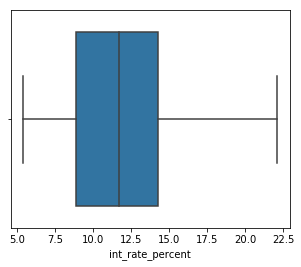

In [50]:
plt.figure(figsize=(5, 4))
sns.boxplot(loan['int_rate_percent'])
plt.show()

In [51]:
loan['int_rate_percent'].describe()

count              37,422.00
mean                   11.80
std                     3.59
min                     5.42
25%                     8.90
50%                    11.71
75%                    14.27
max                    22.11
Name: int_rate_percent, dtype: float64

## annual_inc

In [52]:
print('\nNumber of unique values => ' + str(len(loan['annual_inc'].unique())))
print('\n###############')
print('\nUnique values are => \n\n' + str(pd.Series(loan['annual_inc'].unique()).sort_values(ascending=True)))
print('\n###############')
print('\nFrequency distribution of unique values => \n\n'+ str(loan['annual_inc'].value_counts(dropna=False).sort_values(ascending = False)))


Number of unique values => 5093

###############

Unique values are => 

4590               4,000.00
3801               4,080.00
3999               4,200.00
3473               4,800.00
4632               4,888.00
5077               5,000.00
4749               5,500.00
755                6,000.00
4427               7,000.00
1067               7,200.00
4152               7,500.00
4076               7,800.00
5059               7,904.04
750                8,000.00
3229               8,004.00
1563               8,088.00
664                8,280.00
641                8,400.00
3721               8,412.00
1386               8,472.00
5010               8,500.00
1742               8,628.00
2127               9,000.00
4126               9,081.00
3327               9,192.00
1207               9,240.00
525                9,600.00
4838               9,732.00
1955               9,840.00
3771               9,900.00
2247               9,960.00
594               10,000.00
1726              10,008.00
11

In [53]:
loan['annual_inc'].describe()

count              37,422.00
mean               67,102.59
std                62,947.23
min                 4,000.00
25%                40,000.00
50%                57,009.40
75%                80,000.00
max             6,000,000.00
Name: annual_inc, dtype: float64

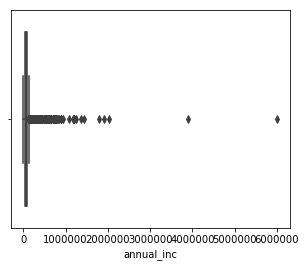

In [54]:
plt.figure(figsize=(5, 4))
sns.boxplot(loan['annual_inc'])
plt.show()

In [55]:
#'''

#Outlier Treatment

Q1 = loan['annual_inc'].quantile(0.25)
Q3 = loan['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

print('IQR => ' + str(IQR))

fence_low  = Q1-1.5*IQR
print('fence_low => ' + str(fence_low))

fence_high = Q3+1.5*IQR
print('fence_high => ' + str(fence_high))

if fence_high > fence_low:
    loan = loan.loc[(loan['annual_inc'] > fence_low) & (loan['annual_inc'] < fence_high)]

#'''

IQR => 40000.0
fence_low => -20000.0
fence_high => 140000.0


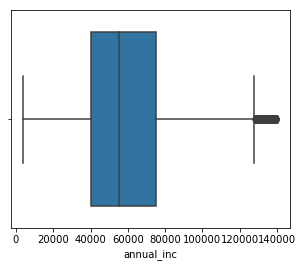

In [56]:
plt.figure(figsize=(5, 4))
sns.boxplot(loan['annual_inc'])
plt.show()

In [57]:
loan['annual_inc'].describe()

count              35,619.00
mean               59,752.71
std                26,948.50
min                 4,000.00
25%                40,000.00
50%                55,000.00
75%                75,000.00
max               139,992.00
Name: annual_inc, dtype: float64

## open_acc

In [58]:
print('\nNumber of unique values => ' + str(len(loan['open_acc'].unique())))
print('\n###############')
print('\nUnique values are => \n\n' + str(pd.Series(loan['open_acc'].unique()).sort_values(ascending=True)))
print('\n###############')
print('\nFrequency distribution of unique values => \n\n'+ str(loan['open_acc'].value_counts(dropna=False).sort_values(ascending = False)))


Number of unique values => 40

###############

Unique values are => 

1      2
0      3
5      4
14     5
11     6
4      7
10     8
3      9
2     10
6     11
8     12
15    13
7     14
12    15
16    16
13    17
19    18
20    19
9     20
18    21
23    22
25    23
24    24
22    25
26    26
29    27
28    28
31    29
17    30
32    31
27    32
30    33
21    34
36    35
34    36
35    38
33    39
38    41
39    42
37    44
dtype: int64

###############

Frequency distribution of unique values => 

7     3681
6     3649
8     3571
9     3341
5     2983
10    2819
11    2407
4     2214
12    1983
13    1651
3     1424
14    1272
15    1005
16     781
17     615
2      578
18     447
19     325
20     241
21     209
22     125
23      79
24      62
25      49
26      25
28      20
27      18
30      10
29       8
31       6
34       5
35       3
33       3
32       3
36       2
39       1
41       1
42       1
38       1
44       1
Name: open_acc, dtype: int64


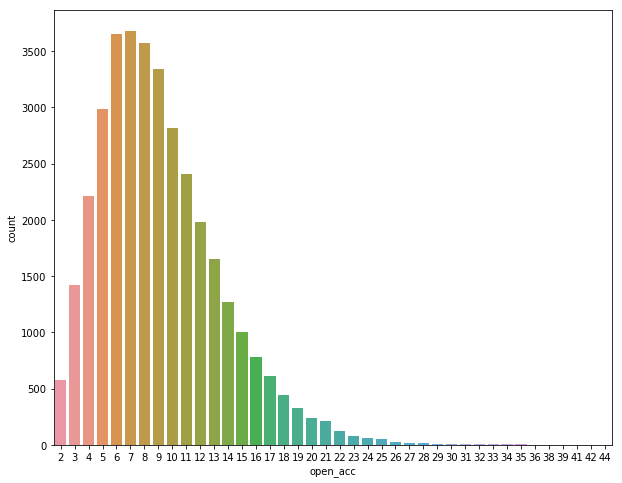

In [59]:
plt.figure(figsize=(10, 8))
sns.countplot(x=loan['open_acc'], data=loan)
plt.show()

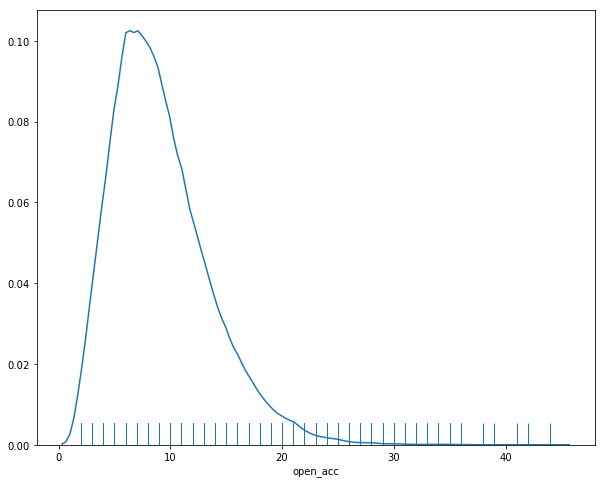

In [60]:
plt.figure(figsize=(10, 8))
sns.distplot(loan['open_acc'], hist=False, rug=True)
plt.show()

## pub_rec

In [61]:
print('\nNumber of unique values => ' + str(len(loan['pub_rec'].unique())))
print('\n###############')
print('\nUnique values are => \n\n' + str(pd.Series(loan['pub_rec'].unique()).sort_values(ascending=True)))
print('\n###############')
print('\nFrequency distribution of unique values => \n\n'+ str(loan['pub_rec'].value_counts(dropna=False).sort_values(ascending = False)))


Number of unique values => 5

###############

Unique values are => 

0    0
1    1
2    2
3    3
4    4
dtype: int64

###############

Frequency distribution of unique values => 

0    33637
1     1928
2       46
3        6
4        2
Name: pub_rec, dtype: int64


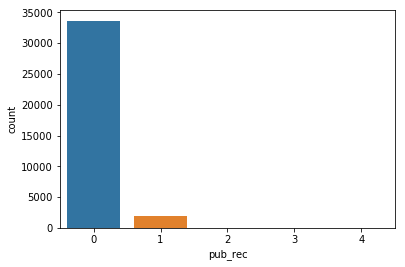

In [62]:
sns.countplot(x=loan['pub_rec'], data=loan)
plt.show()

## revol_bal

In [63]:
print('\nNumber of unique values => ' + str(len(loan['revol_bal'].unique())))
print('\n###############')
print('\nUnique values are => \n\n' + str(pd.Series(loan['revol_bal'].unique()).sort_values(ascending=True)))
print('\n###############')
print('\nFrequency distribution of unique values => \n\n'+ str(loan['revol_bal'].value_counts(dropna=False).sort_values(ascending = False)))


Number of unique values => 19677

###############

Unique values are => 

17            0
3887          1
3823          2
2496          3
10878         4
13213         5
2660          6
3370          7
446           8
7809          9
6854         10
5200         11
8934         12
3209         13
6634         14
5629         15
1074         16
11749        17
8903         18
5493         19
9627         20
3164         21
7670         23
8324         24
995          25
7529         26
7063         27
16563        28
9362         29
3827         30
12761        31
10657        32
2469         33
9701         34
17380        35
15994        36
5689         37
19323        38
3916         39
5081         40
3032         41
9882         42
5776         43
9611         44
12345        45
18347        47
6834         48
18239        49
2820         50
4182         51
4589         52
5954         53
4120         54
9457         55
13229        56
13482        57
8813         58
4041         

In [64]:
loan['revol_bal'].describe()

count              35,619.00
mean               11,988.90
std                13,394.67
min                     0.00
25%                 3,480.00
50%                 8,313.00
75%                15,755.00
max               149,000.00
Name: revol_bal, dtype: float64

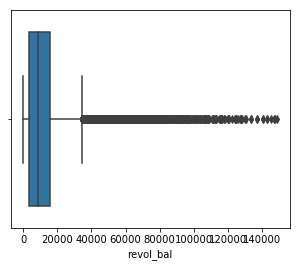

In [65]:
plt.figure(figsize=(5, 4))
sns.boxplot(loan['revol_bal'])
plt.show()

In [66]:
#'''

#Outlier Treatment

Q1 = loan['revol_bal'].quantile(0.25)
Q3 = loan['revol_bal'].quantile(0.75)
IQR = Q3 - Q1

print('IQR => ' + str(IQR))

fence_low  = Q1-1.5*IQR
print('fence_low => ' + str(fence_low))

fence_high = Q3+1.5*IQR
print('fence_high => ' + str(fence_high))

if fence_high > fence_low:
    loan = loan.loc[(loan['revol_bal'] > fence_low) & (loan['revol_bal'] < fence_high)]

#'''

IQR => 12275.0
fence_low => -14932.5
fence_high => 34167.5


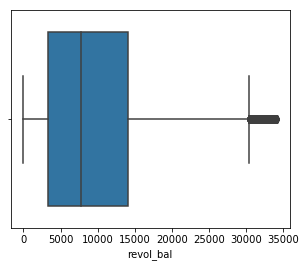

In [67]:
plt.figure(figsize=(5, 4))
sns.boxplot(loan['revol_bal'])
plt.show()

In [68]:
loan['revol_bal'].describe()

count              33,659.00
mean                9,591.32
std                 7,874.31
min                     0.00
25%                 3,265.00
50%                 7,705.00
75%                14,104.50
max                34,155.00
Name: revol_bal, dtype: float64

## pub_rec_bankruptcies

In [69]:
print('\nNumber of unique values => ' + str(len(loan['pub_rec_bankruptcies'].unique())))
print('\n###############')
print('\nUnique values are => \n\n' + str(pd.Series(loan['pub_rec_bankruptcies'].unique()).sort_values(ascending=True)))
print('\n###############')
print('\nFrequency distribution of unique values => \n\n'+ str(loan['pub_rec_bankruptcies'].value_counts(dropna=False).sort_values(ascending = False)))


Number of unique values => 3

###############

Unique values are => 

0                   0.00
1                   1.00
2                   2.00
dtype: float64

###############

Frequency distribution of unique values => 

0.00    32110
1.00     1544
2.00        5
Name: pub_rec_bankruptcies, dtype: int64


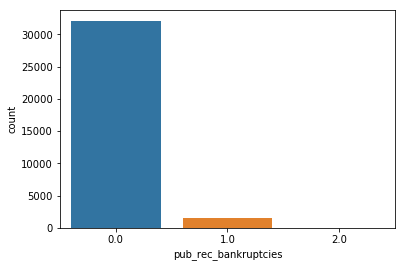

In [70]:
sns.countplot(x=loan['pub_rec_bankruptcies'], data=loan)
plt.show()

## delinq_2yrs

In [71]:
print('\nNumber of unique values => ' + str(len(loan['delinq_2yrs'].unique())))
print('\n###############')
print('\nUnique values are => \n\n' + str(pd.Series(loan['delinq_2yrs'].unique()).sort_values(ascending=True)))
print('\n###############')
print('\nFrequency distribution of unique values => \n\n'+ str(loan['delinq_2yrs'].value_counts(dropna=False).sort_values(ascending = False)))


Number of unique values => 11

###############

Unique values are => 

0      0
3      1
1      2
2      3
4      4
6      5
5      6
8      7
7      8
9      9
10    11
dtype: int64

###############

Frequency distribution of unique values => 

0     29988
1      2817
2       573
3       191
4        54
5        18
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64


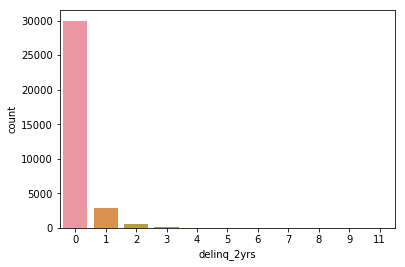

In [72]:
sns.countplot(x=loan['delinq_2yrs'], data=loan)
plt.show()

## inq_last_6mths

In [73]:
print('\nNumber of unique values => ' + str(len(loan['inq_last_6mths'].unique())))
print('\n###############')
print('\nUnique values are => \n\n' + str(pd.Series(loan['inq_last_6mths'].unique()).sort_values(ascending=True)))
print('\n###############')
print('\nFrequency distribution of unique values => \n\n'+ str(loan['inq_last_6mths'].value_counts(dropna=False).sort_values(ascending = False)))


Number of unique values => 9

###############

Unique values are => 

4    0
0    1
2    2
3    3
5    4
1    5
6    6
7    7
8    8
dtype: int64

###############

Frequency distribution of unique values => 

0    16356
1     9325
2     4928
3     2588
4      257
5      124
6       44
7       27
8       10
Name: inq_last_6mths, dtype: int64


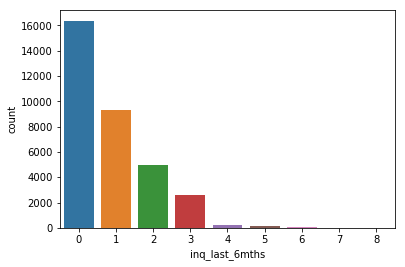

In [74]:
sns.countplot(x=loan['inq_last_6mths'], data=loan)
plt.show()

## dti

In [75]:
print('\nNumber of unique values => ' + str(len(loan['dti'].unique())))
print('\n###############')
print('\nUnique values are => \n\n' + str(pd.Series(loan['dti'].unique()).sort_values(ascending=True)))
print('\n###############')
print('\nFrequency distribution of unique values => \n\n'+ str(loan['dti'].value_counts(dropna=False).sort_values(ascending = False)))


Number of unique values => 2822

###############

Unique values are => 

1536                   0.00
2796                   0.01
1582                   0.02
2807                   0.03
2717                   0.04
2662                   0.05
1448                   0.07
2760                   0.08
2818                   0.09
2663                   0.11
2819                   0.12
2793                   0.13
2316                   0.14
2188                   0.15
1904                   0.16
2808                   0.17
2708                   0.18
1833                   0.19
2591                   0.20
2474                   0.21
2815                   0.22
2786                   0.23
2286                   0.24
1627                   0.25
1970                   0.26
2418                   0.27
2500                   0.28
2569                   0.29
2768                   0.30
1786                   0.31
979                    0.32
1827                   0.33
2735                   0.34
18

In [76]:
loan['dti'].describe()

count              33,659.00
mean                   13.22
std                     6.66
min                     0.00
25%                     8.08
50%                    13.30
75%                    18.48
max                    29.99
Name: dti, dtype: float64

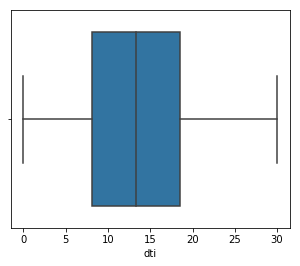

In [77]:
plt.figure(figsize=(5, 4))
sns.boxplot(loan['dti'])
plt.show()

## revol_util_percent

In [78]:
print('\nNumber of unique values => ' + str(len(loan['revol_util_percent'].unique())))
print('\n###############')
print('\nUnique values are => \n\n' + str(pd.Series(loan['revol_util_percent'].unique()).sort_values(ascending=True)))
print('\n###############')
print('\nFrequency distribution of unique values => \n\n'+ str(loan['revol_util_percent'].value_counts(dropna=False).sort_values(ascending = False)))


Number of unique values => 1078

###############

Unique values are => 

556                    0.00
1026                   0.01
982                    0.03
1076                   0.04
1067                   0.05
340                    0.10
786                    0.12
981                    0.16
851                    0.20
748                    0.30
570                    0.40
954                    0.46
980                    0.49
768                    0.50
1023                   0.54
106                    0.60
436                    0.70
1031                   0.75
687                    0.80
1020                   0.83
983                    0.86
832                    0.90
860                    1.00
802                    1.10
927                    1.20
861                    1.30
894                    1.40
813                    1.50
862                    1.60
964                    1.70
717                    1.80
1057                   1.88
650                    1.90
86

In [79]:
loan['revol_util_percent'].describe()

count              33,659.00
mean                   47.74
std                    28.19
min                     0.00
25%                    24.40
50%                    47.70
75%                    70.90
max                    99.90
Name: revol_util_percent, dtype: float64

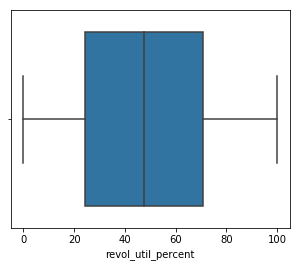

In [80]:
plt.figure(figsize=(5, 4))
sns.boxplot(loan['revol_util_percent'])
plt.show()

## grade

In [81]:
loan['grade'].value_counts(dropna=False).sort_values(ascending = False)

B    10280
A     9065
C     6925
D     4428
E     2075
F      721
G      165
Name: grade, dtype: int64

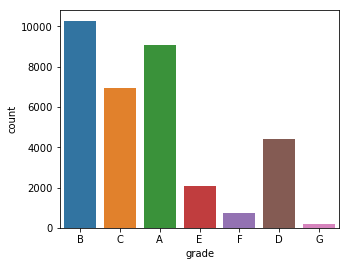

In [82]:
plt.figure(figsize=(5, 4))
sns.countplot(x="grade", data=loan)
plt.show()

## emp_length

In [83]:
loan['emp_length'].value_counts(dropna=False).sort_values(ascending = False)

10+ years    6744
< 1 year     4089
2 years      3882
3 years      3612
4 years      2990
1 year       2866
5 years      2832
6 years      1908
7 years      1503
8 years      1220
9 years      1057
Missing       956
Name: emp_length, dtype: int64

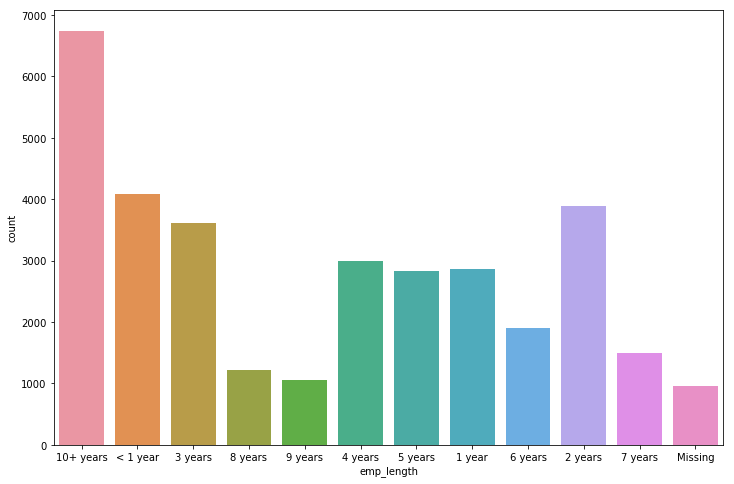

In [84]:
plt.figure(figsize=(12, 8))
sns.countplot(x="emp_length", data=loan)
plt.show()

## home_ownership

In [85]:
loan['home_ownership'].value_counts(dropna=False).sort_values(ascending = False)

RENT        17329
MORTGAGE    13552
OWN          2685
OTHER          90
NONE            3
Name: home_ownership, dtype: int64

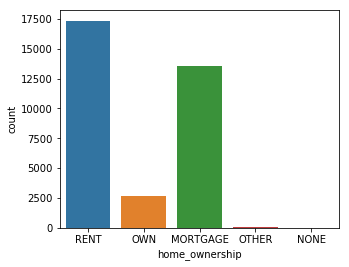

In [86]:
plt.figure(figsize=(5, 4))
sns.countplot(x="home_ownership", data=loan)
plt.show()

## verification_status

In [87]:
loan['verification_status'].value_counts(dropna=False).sort_values(ascending = False)

Not Verified       15504
Verified            9500
Source Verified     8655
Name: verification_status, dtype: int64

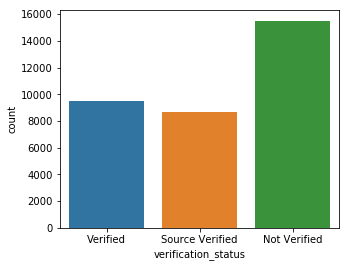

In [88]:
plt.figure(figsize=(5, 4))
sns.countplot(x="verification_status", data=loan)
plt.show()

## purpose

In [89]:
loan['purpose'].value_counts(dropna=False).sort_values(ascending = False)

debt_consolidation    15818
credit_card            4272
other                  3471
home_improvement       2330
major_purchase         1952
small_business         1419
car                    1351
wedding                 857
medical                 607
moving                  531
vacation                352
house                   313
educational             296
renewable_energy         90
Name: purpose, dtype: int64

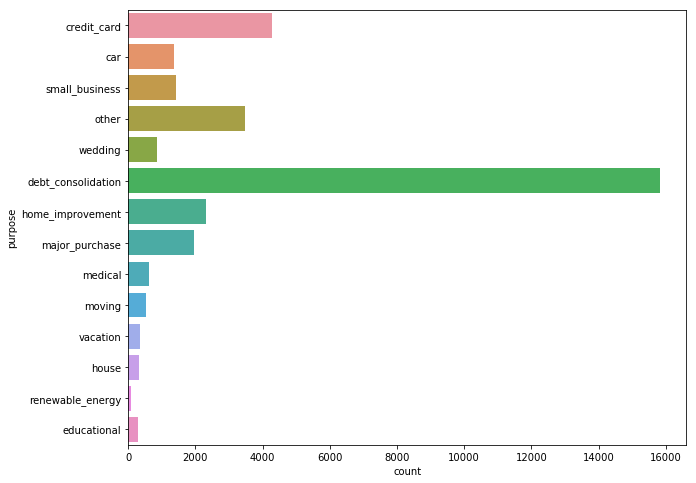

In [90]:
plt.figure(figsize=(10, 8))
sns.countplot(y="purpose", data=loan)
plt.show()

## addr_state

In [91]:
loan['addr_state'].value_counts(dropna=False).sort_values(ascending = False)

CA    6025
NY    3234
FL    2442
TX    2290
NJ    1526
PA    1336
IL    1280
VA    1166
GA    1148
MA    1123
OH    1053
MD     869
AZ     740
WA     715
CO     681
NC     664
CT     606
MO     606
MI     602
MN     541
NV     418
SC     404
OR     398
WI     389
AL     381
LA     375
KY     280
OK     267
KS     224
UT     220
AR     218
DC     176
RI     171
NM     166
WV     158
HI     150
NH     144
DE      98
WY      76
MT      75
AK      60
SD      56
VT      51
MS      16
TN      15
IN       9
IA       5
ID       5
NE       4
ME       3
Name: addr_state, dtype: int64

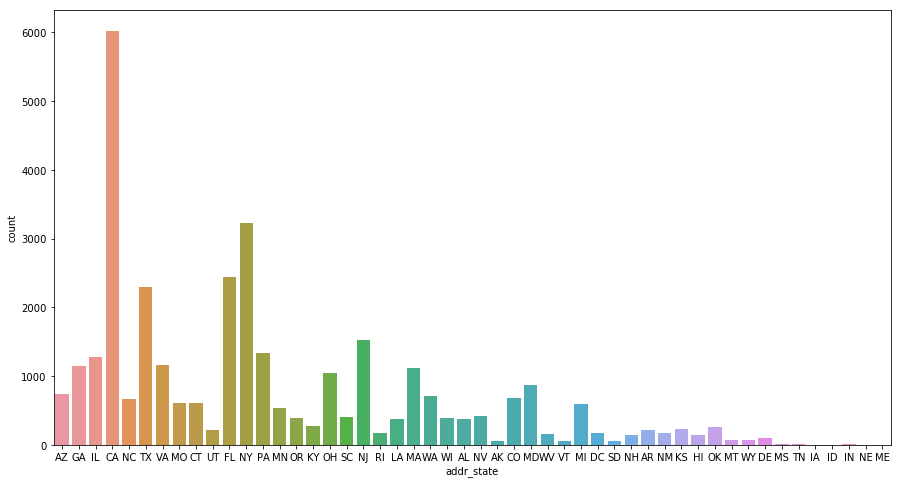

In [92]:
plt.figure(figsize=(15, 8))
sns.countplot(x="addr_state", data=loan)
plt.show()

## term

In [93]:
loan['term'].value_counts(dropna=False).sort_values(ascending = False)

36 months    25972
60 months     7687
Name: term, dtype: int64

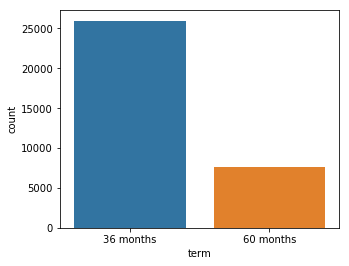

In [94]:
plt.figure(figsize=(5, 4))
sns.countplot(x="term", data=loan)
plt.show()

## Data Check

In [95]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33659 entries, 0 to 39716
Data columns (total 19 columns):
loan_amnt               33659 non-null int64
term                    33659 non-null object
int_rate_percent        33659 non-null float64
grade                   33659 non-null object
emp_length              33659 non-null object
home_ownership          33659 non-null object
annual_inc              33659 non-null float64
verification_status     33659 non-null object
loan_status             33659 non-null object
purpose                 33659 non-null object
addr_state              33659 non-null object
dti                     33659 non-null float64
delinq_2yrs             33659 non-null int64
inq_last_6mths          33659 non-null int64
open_acc                33659 non-null int64
pub_rec                 33659 non-null int64
revol_bal               33659 non-null int64
revol_util_percent      33659 non-null float64
pub_rec_bankruptcies    33659 non-null float64
dtypes: float64(5)

In [96]:
loan.describe()

loan_amnt     int_rate_percent           annual_inc  \
count            33,659.00            33,659.00            33,659.00   
mean              9,946.20                11.77            57,965.45   
std               6,116.21                 3.59            25,986.02   
min                 500.00                 5.42             4,000.00   
25%               5,000.00                 8.90            38,986.50   
50%               8,800.00                11.71            54,000.00   
75%              14,000.00                14.26            73,068.41   
max              29,500.00                22.11           139,992.00   

                       dti          delinq_2yrs       inq_last_6mths  \
count            33,659.00            33,659.00            33,659.00   
mean                 13.22                 0.15                 0.87   
std                   6.66                 0.50                 1.06   
min                   0.00                 0.00                 0.00   
25%                   8.08                 0.00                 0.00   
50%                  13.30                 0.00                 1.00   
75%                  18.48                 0.00                 1.00   
max                  29.99                11.00                 8.00   

                  open_acc              pub_rec            revol_bal  \
count            33,659.00            33,659.00            33,659.00   
mean                  8.97                 0.06             9,591.32   
std                   4.28                 0.25             7,874.31   
min                   2.00                 0.00                 0.00   
25%                   6.00                 0.00             3,265.00   
50%                   8.00                 0.00             7,705.00   
75%                  11.00                 0.00            14,104.50   
max                  42.00                 4.00            34,155.00   

        revol_util_percent  pub_rec_bankruptcies  
count            33,659.00             33,659.00  
mean                 47.74                  0.05  
std                  28.19                  0.21  
min                   0.00                  0.00  
25%                  24.40                  0.00  
50%                  47.70                  0.00  
75%                  70.90                  0.00  
max                  99.90                  2.00

# <font color='green'>Segmented Univariate Analysis</font>

### Function for segmented univariate analysis for numeric variables

In [97]:
def segmented_univariate_numeric(x, y):
        
    print('\nNumber of unique values => ' + str(len(loan[y].unique())) + '\n\n')
    
    # Create 2 subplots for mean and median respectively

    plt.figure(figsize=(10, 4))

    # subplot 1: statistic=mean
    plt.subplot(1, 2, 1)
    sns.barplot(x=x, y=y, data=loan)
    plt.title("Mean")

    # subplot 2: statistic=median
    plt.subplot(1, 2, 2)
    sns.barplot(x=x, y=y, data=loan, estimator=np.median)
    plt.title("Median")

    plt.show()

### Function for segmented univariate analysis for categorical variables

In [98]:
def segmented_univariate_categorical(x, hue):
        
    print('\nNumber of unique values => ' + str(len(loan[hue].unique())) + '\n\n')
    
    plt.figure(figsize=(10, 8))

    x, hue = x, hue
    y = "count"

    plt.subplot(1, 2, 1)
    sns.countplot(x=x, hue=hue, data=loan)

    count_loan = (loan[x]
               .groupby(loan[hue])
               .value_counts()
               .rename(y)
               .reset_index())

    y = "percent(%)"

    percent_loan = (loan[x]
               .groupby(loan[hue])
               .value_counts(normalize=True)
               .rename(y)
               .reset_index())

    plt.subplot(1, 2, 2)
    sns.barplot(x=x, y=y, hue=hue, data=percent_loan)

    plt.show()

    print(tabulate(pd.merge(percent_loan, count_loan, how='inner'), headers='keys', tablefmt='fancy_grid'))

### loan_amnt


Number of unique values => 797




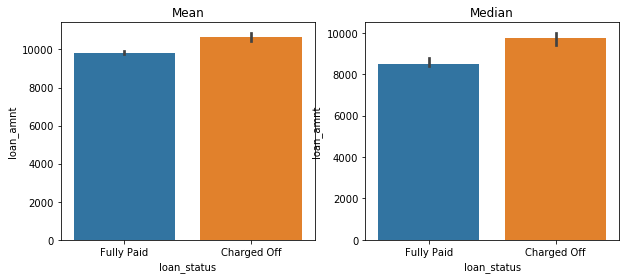

In [99]:
segmented_univariate_numeric('loan_status', 'loan_amnt')

### int_rate_percent


Number of unique values => 354




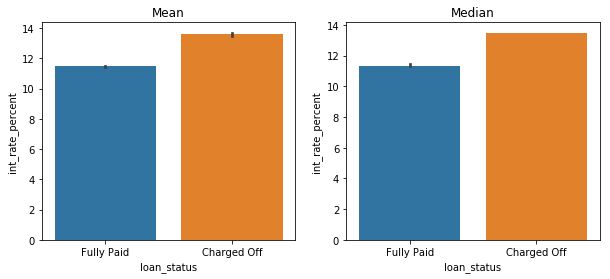

In [100]:
segmented_univariate_numeric('loan_status', 'int_rate_percent')

### annual_inc


Number of unique values => 4479




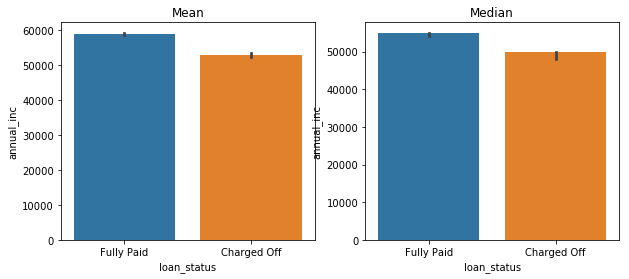

In [101]:
segmented_univariate_numeric('loan_status', 'annual_inc')

### dti


Number of unique values => 2822




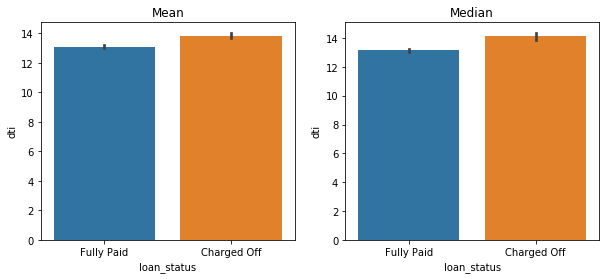

In [102]:
segmented_univariate_numeric('loan_status', 'dti')

### delinq_2yrs


Number of unique values => 11




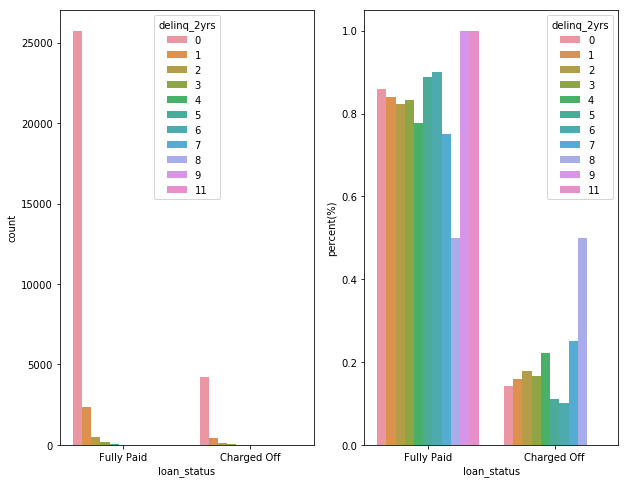

╒════╤═══════════════╤═══════════════╤══════════════╤═════════╕
│    │   delinq_2yrs │ loan_status   │   percent(%) │   count │
╞════╪═══════════════╪═══════════════╪══════════════╪═════════╡
│  0 │             0 │ Fully Paid    │     0.85851  │   25745 │
├────┼───────────────┼───────────────┼──────────────┼─────────┤
│  1 │             0 │ Charged Off   │     0.14149  │    4243 │
├────┼───────────────┼───────────────┼──────────────┼─────────┤
│  2 │             1 │ Fully Paid    │     0.840611 │    2368 │
├────┼───────────────┼───────────────┼──────────────┼─────────┤
│  3 │             1 │ Charged Off   │     0.159389 │     449 │
├────┼───────────────┼───────────────┼──────────────┼─────────┤
│  4 │             2 │ Fully Paid    │     0.82199  │     471 │
├────┼───────────────┼───────────────┼──────────────┼─────────┤
│  5 │             2 │ Charged Off   │     0.17801  │     102 │
├────┼───────────────┼───────────────┼──────────────┼─────────┤
│  6 │             3 │ Fully Paid    │  

In [103]:
segmented_univariate_categorical("loan_status", "delinq_2yrs")

### inq_last_6mths


Number of unique values => 9




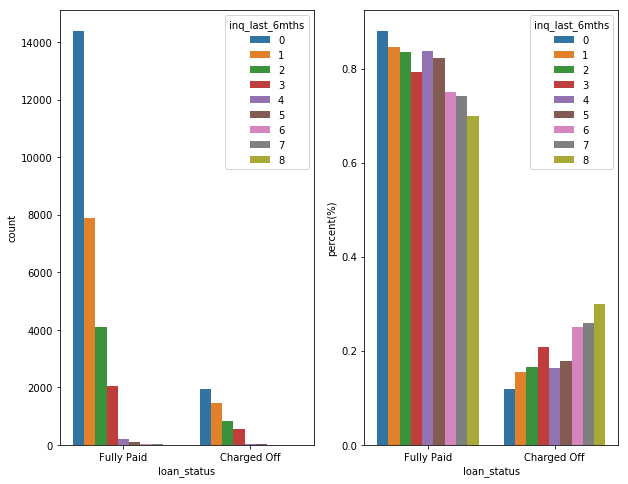

╒════╤══════════════════╤═══════════════╤══════════════╤═════════╕
│    │   inq_last_6mths │ loan_status   │   percent(%) │   count │
╞════╪══════════════════╪═══════════════╪══════════════╪═════════╡
│  0 │                0 │ Fully Paid    │     0.88035  │   14399 │
├────┼──────────────────┼───────────────┼──────────────┼─────────┤
│  1 │                0 │ Charged Off   │     0.11965  │    1957 │
├────┼──────────────────┼───────────────┼──────────────┼─────────┤
│  2 │                1 │ Fully Paid    │     0.844718 │    7877 │
├────┼──────────────────┼───────────────┼──────────────┼─────────┤
│  3 │                1 │ Charged Off   │     0.155282 │    1448 │
├────┼──────────────────┼───────────────┼──────────────┼─────────┤
│  4 │                2 │ Fully Paid    │     0.834213 │    4111 │
├────┼──────────────────┼───────────────┼──────────────┼─────────┤
│  5 │                2 │ Charged Off   │     0.165787 │     817 │
├────┼──────────────────┼───────────────┼──────────────┼──────

In [104]:
segmented_univariate_categorical("loan_status", "inq_last_6mths")

### open_acc


Number of unique values => 39




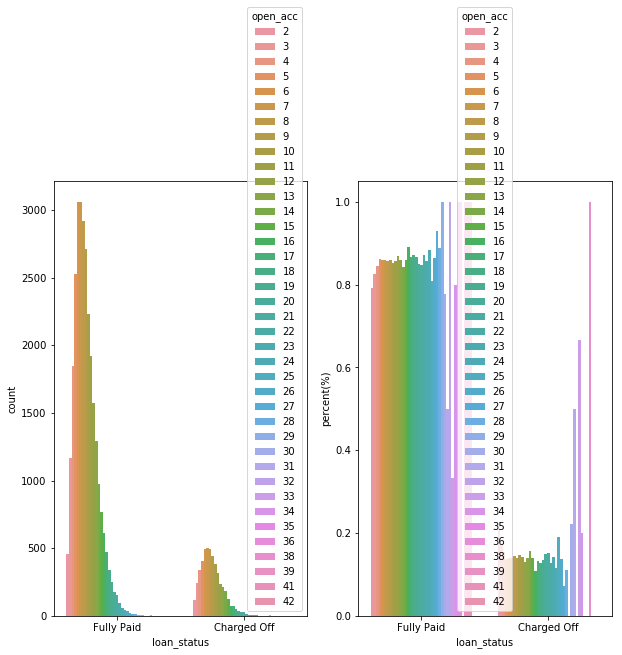

╒════╤════════════╤═══════════════╤══════════════╤═════════╕
│    │   open_acc │ loan_status   │   percent(%) │   count │
╞════╪════════════╪═══════════════╪══════════════╪═════════╡
│  0 │          2 │ Fully Paid    │    0.791304  │     455 │
├────┼────────────┼───────────────┼──────────────┼─────────┤
│  1 │          2 │ Charged Off   │    0.208696  │     120 │
├────┼────────────┼───────────────┼──────────────┼─────────┤
│  2 │          3 │ Fully Paid    │    0.825779  │    1166 │
├────┼────────────┼───────────────┼──────────────┼─────────┤
│  3 │          3 │ Charged Off   │    0.174221  │     246 │
├────┼────────────┼───────────────┼──────────────┼─────────┤
│  4 │          4 │ Fully Paid    │    0.84478   │    1845 │
├────┼────────────┼───────────────┼──────────────┼─────────┤
│  5 │          4 │ Charged Off   │    0.15522   │     339 │
├────┼────────────┼───────────────┼──────────────┼─────────┤
│  6 │          5 │ Fully Paid    │    0.862257  │    2529 │
├────┼────────────┼─────

In [105]:
segmented_univariate_categorical("loan_status", "open_acc")

### pub_rec


Number of unique values => 5




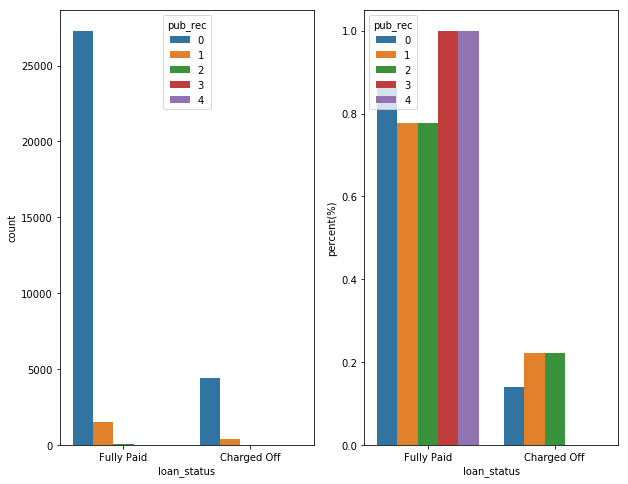

╒════╤═══════════╤═══════════════╤══════════════╤═════════╕
│    │   pub_rec │ loan_status   │   percent(%) │   count │
╞════╪═══════════╪═══════════════╪══════════════╪═════════╡
│  0 │         0 │ Fully Paid    │     0.86086  │   27297 │
├────┼───────────┼───────────────┼──────────────┼─────────┤
│  1 │         0 │ Charged Off   │     0.13914  │    4412 │
├────┼───────────┼───────────────┼──────────────┼─────────┤
│  2 │         1 │ Fully Paid    │     0.778071 │    1476 │
├────┼───────────┼───────────────┼──────────────┼─────────┤
│  3 │         1 │ Charged Off   │     0.221929 │     421 │
├────┼───────────┼───────────────┼──────────────┼─────────┤
│  4 │         2 │ Fully Paid    │     0.777778 │      35 │
├────┼───────────┼───────────────┼──────────────┼─────────┤
│  5 │         2 │ Charged Off   │     0.222222 │      10 │
├────┼───────────┼───────────────┼──────────────┼─────────┤
│  6 │         3 │ Fully Paid    │     1        │       6 │
├────┼───────────┼───────────────┼──────

In [106]:
segmented_univariate_categorical("loan_status", "pub_rec")

### revol_bal


Number of unique values => 17786




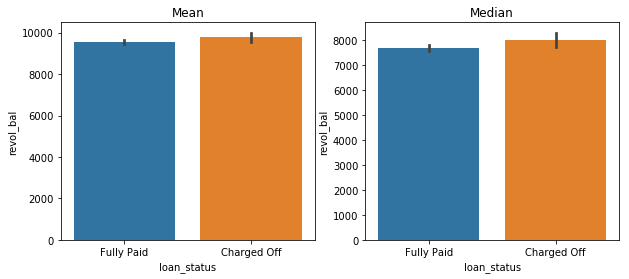

In [107]:
segmented_univariate_numeric('loan_status', 'revol_bal')

### revol_util_percent


Number of unique values => 1078




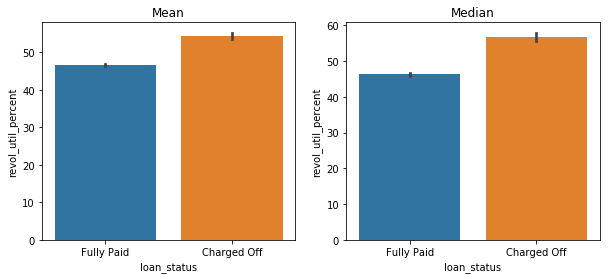

In [108]:
segmented_univariate_numeric('loan_status', 'revol_util_percent')

### pub_rec_bankruptcies


Number of unique values => 3




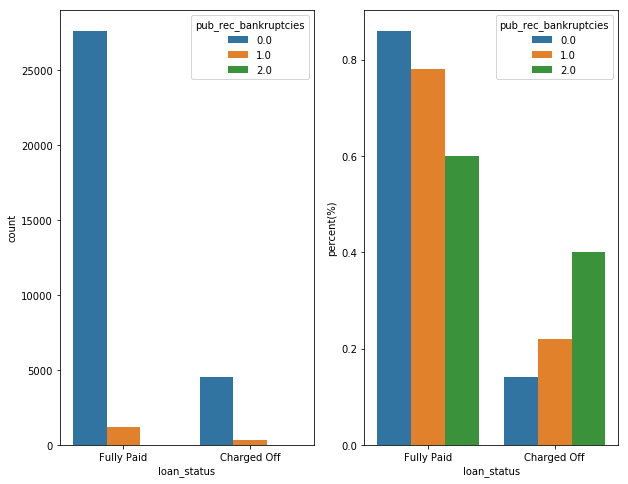

╒════╤════════════════════════╤═══════════════╤══════════════╤═════════╕
│    │   pub_rec_bankruptcies │ loan_status   │   percent(%) │   count │
╞════╪════════════════════════╪═══════════════╪══════════════╪═════════╡
│  0 │                      0 │ Fully Paid    │     0.859763 │   27607 │
├────┼────────────────────────┼───────────────┼──────────────┼─────────┤
│  1 │                      0 │ Charged Off   │     0.140237 │    4503 │
├────┼────────────────────────┼───────────────┼──────────────┼─────────┤
│  2 │                      1 │ Fully Paid    │     0.781088 │    1206 │
├────┼────────────────────────┼───────────────┼──────────────┼─────────┤
│  3 │                      1 │ Charged Off   │     0.218912 │     338 │
├────┼────────────────────────┼───────────────┼──────────────┼─────────┤
│  4 │                      2 │ Fully Paid    │     0.6      │       3 │
├────┼────────────────────────┼───────────────┼──────────────┼─────────┤
│  5 │                      2 │ Charged Off   │    

In [109]:
segmented_univariate_categorical("loan_status", "pub_rec_bankruptcies")

### term


Number of unique values => 2




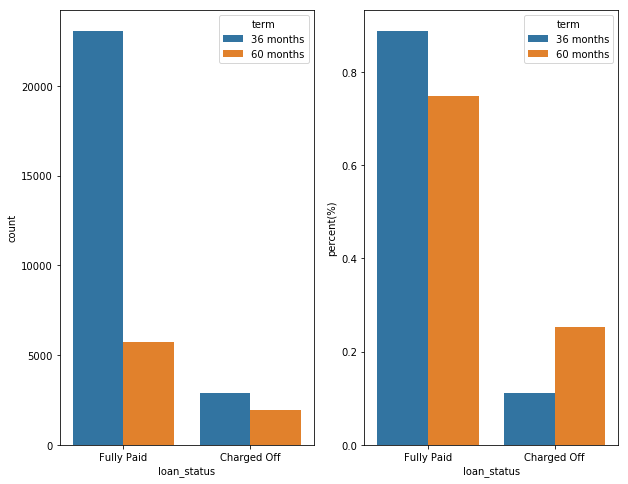

╒════╤═══════════╤═══════════════╤══════════════╤═════════╕
│    │ term      │ loan_status   │   percent(%) │   count │
╞════╪═══════════╪═══════════════╪══════════════╪═════════╡
│  0 │ 36 months │ Fully Paid    │     0.888226 │   23069 │
├────┼───────────┼───────────────┼──────────────┼─────────┤
│  1 │ 36 months │ Charged Off   │     0.111774 │    2903 │
├────┼───────────┼───────────────┼──────────────┼─────────┤
│  2 │ 60 months │ Fully Paid    │     0.747626 │    5747 │
├────┼───────────┼───────────────┼──────────────┼─────────┤
│  3 │ 60 months │ Charged Off   │     0.252374 │    1940 │
╘════╧═══════════╧═══════════════╧══════════════╧═════════╛


In [110]:
segmented_univariate_categorical("loan_status", "term")

__Inference__

60 months term has higher percentage of default loans hence the higher chance of default.

### grade


Number of unique values => 7




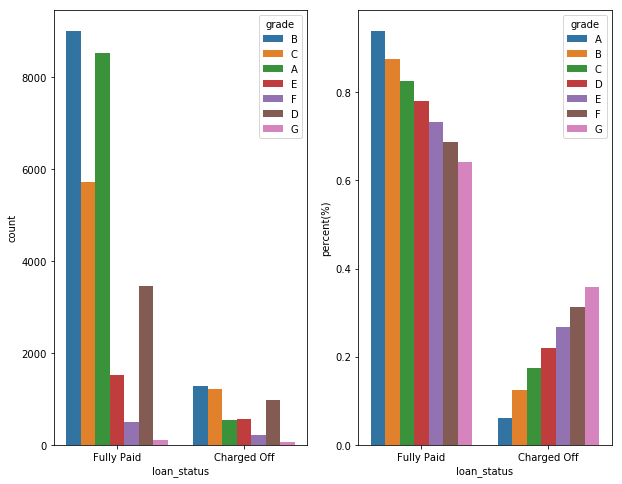

╒════╤═════════╤═══════════════╤══════════════╤═════════╕
│    │ grade   │ loan_status   │   percent(%) │   count │
╞════╪═════════╪═══════════════╪══════════════╪═════════╡
│  0 │ A       │ Fully Paid    │    0.939437  │    8516 │
├────┼─────────┼───────────────┼──────────────┼─────────┤
│  1 │ A       │ Charged Off   │    0.0605626 │     549 │
├────┼─────────┼───────────────┼──────────────┼─────────┤
│  2 │ B       │ Fully Paid    │    0.876362  │    9009 │
├────┼─────────┼───────────────┼──────────────┼─────────┤
│  3 │ B       │ Charged Off   │    0.123638  │    1271 │
├────┼─────────┼───────────────┼──────────────┼─────────┤
│  4 │ C       │ Fully Paid    │    0.825704  │    5718 │
├────┼─────────┼───────────────┼──────────────┼─────────┤
│  5 │ C       │ Charged Off   │    0.174296  │    1207 │
├────┼─────────┼───────────────┼──────────────┼─────────┤
│  6 │ D       │ Fully Paid    │    0.779133  │    3450 │
├────┼─────────┼───────────────┼──────────────┼─────────┤
│  7 │ D      

In [111]:
segmented_univariate_categorical("loan_status", "grade")

__Inference__

Grades C,D are contributing to loan default.

### emp_length


Number of unique values => 12




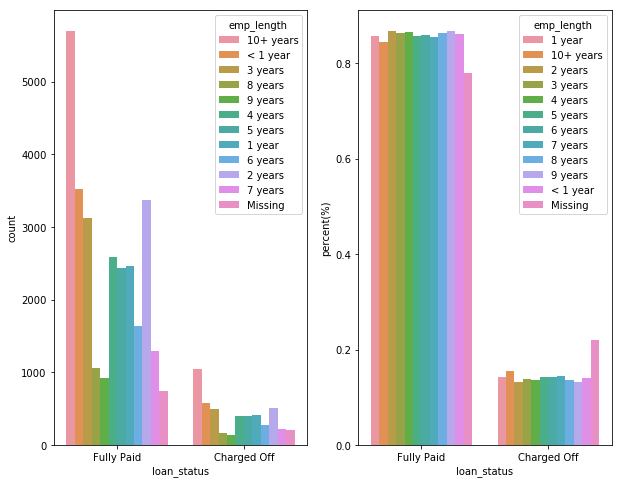

╒════╤══════════════╤═══════════════╤══════════════╤═════════╕
│    │ emp_length   │ loan_status   │   percent(%) │   count │
╞════╪══════════════╪═══════════════╪══════════════╪═════════╡
│  0 │ 1 year       │ Fully Paid    │     0.856943 │    2456 │
├────┼──────────────┼───────────────┼──────────────┼─────────┤
│  1 │ 1 year       │ Charged Off   │     0.143057 │     410 │
├────┼──────────────┼───────────────┼──────────────┼─────────┤
│  2 │ 10+ years    │ Fully Paid    │     0.845047 │    5699 │
├────┼──────────────┼───────────────┼──────────────┼─────────┤
│  3 │ 10+ years    │ Charged Off   │     0.154953 │    1045 │
├────┼──────────────┼───────────────┼──────────────┼─────────┤
│  4 │ 2 years      │ Fully Paid    │     0.868109 │    3370 │
├────┼──────────────┼───────────────┼──────────────┼─────────┤
│  5 │ 2 years      │ Charged Off   │     0.131891 │     512 │
├────┼──────────────┼───────────────┼──────────────┼─────────┤
│  6 │ 3 years      │ Fully Paid    │     0.86268  │   

In [112]:
segmented_univariate_categorical("loan_status", "emp_length")

### home_ownership


Number of unique values => 5




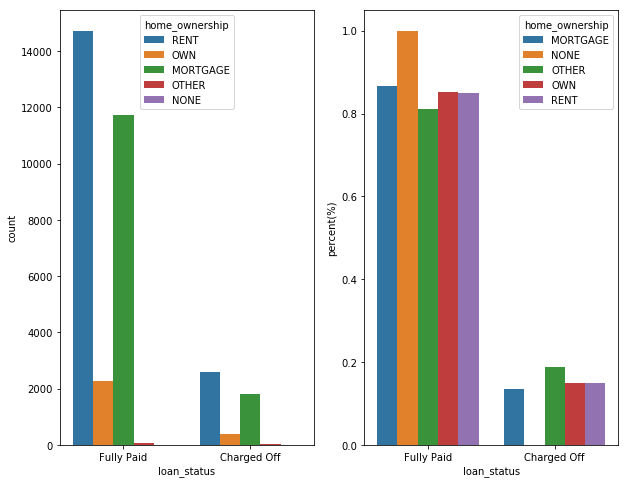

╒════╤══════════════════╤═══════════════╤══════════════╤═════════╕
│    │ home_ownership   │ loan_status   │   percent(%) │   count │
╞════╪══════════════════╪═══════════════╪══════════════╪═════════╡
│  0 │ MORTGAGE         │ Fully Paid    │     0.865776 │   11733 │
├────┼──────────────────┼───────────────┼──────────────┼─────────┤
│  1 │ MORTGAGE         │ Charged Off   │     0.134224 │    1819 │
├────┼──────────────────┼───────────────┼──────────────┼─────────┤
│  2 │ NONE             │ Fully Paid    │     1        │       3 │
├────┼──────────────────┼───────────────┼──────────────┼─────────┤
│  3 │ OTHER            │ Fully Paid    │     0.811111 │      73 │
├────┼──────────────────┼───────────────┼──────────────┼─────────┤
│  4 │ OTHER            │ Charged Off   │     0.188889 │      17 │
├────┼──────────────────┼───────────────┼──────────────┼─────────┤
│  5 │ OWN              │ Fully Paid    │     0.851024 │    2285 │
├────┼──────────────────┼───────────────┼──────────────┼──────

In [113]:
segmented_univariate_categorical("loan_status", "home_ownership")

__Inference__

Borrowers whose are currently living in a rented accommodation or their house is on mortgage are more likely to default.

### verification_status


Number of unique values => 3




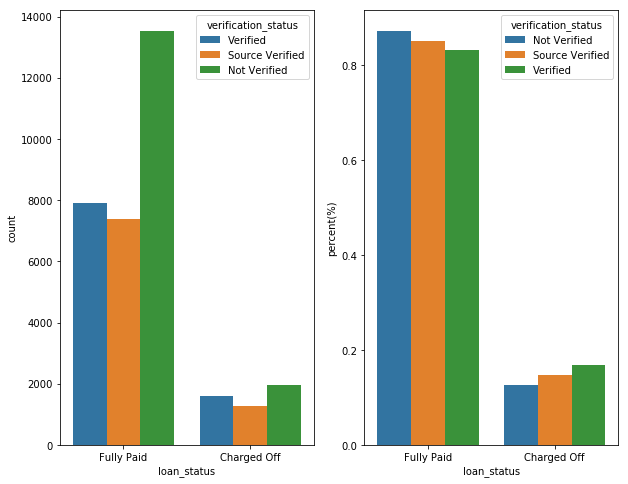

╒════╤═══════════════════════╤═══════════════╤══════════════╤═════════╕
│    │ verification_status   │ loan_status   │   percent(%) │   count │
╞════╪═══════════════════════╪═══════════════╪══════════════╪═════════╡
│  0 │ Not Verified          │ Fully Paid    │     0.873194 │   13538 │
├────┼───────────────────────┼───────────────┼──────────────┼─────────┤
│  1 │ Not Verified          │ Charged Off   │     0.126806 │    1966 │
├────┼───────────────────────┼───────────────┼──────────────┼─────────┤
│  2 │ Source Verified       │ Fully Paid    │     0.852224 │    7376 │
├────┼───────────────────────┼───────────────┼──────────────┼─────────┤
│  3 │ Source Verified       │ Charged Off   │     0.147776 │    1279 │
├────┼───────────────────────┼───────────────┼──────────────┼─────────┤
│  4 │ Verified              │ Fully Paid    │     0.831789 │    7902 │
├────┼───────────────────────┼───────────────┼──────────────┼─────────┤
│  5 │ Verified              │ Charged Off   │     0.168211 │   

In [114]:
segmented_univariate_categorical("loan_status", "verification_status")

### purpose


Number of unique values => 14




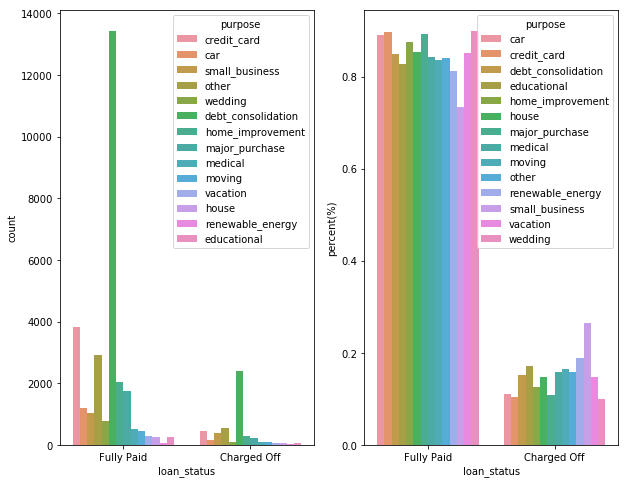

╒════╤════════════════════╤═══════════════╤══════════════╤═════════╕
│    │ purpose            │ loan_status   │   percent(%) │   count │
╞════╪════════════════════╪═══════════════╪══════════════╪═════════╡
│  0 │ car                │ Fully Paid    │     0.890452 │    1203 │
├────┼────────────────────┼───────────────┼──────────────┼─────────┤
│  1 │ car                │ Charged Off   │     0.109548 │     148 │
├────┼────────────────────┼───────────────┼──────────────┼─────────┤
│  2 │ credit_card        │ Fully Paid    │     0.895833 │    3827 │
├────┼────────────────────┼───────────────┼──────────────┼─────────┤
│  3 │ credit_card        │ Charged Off   │     0.104167 │     445 │
├────┼────────────────────┼───────────────┼──────────────┼─────────┤
│  4 │ debt_consolidation │ Fully Paid    │     0.849159 │   13432 │
├────┼────────────────────┼───────────────┼──────────────┼─────────┤
│  5 │ debt_consolidation │ Charged Off   │     0.150841 │    2386 │
├────┼────────────────────┼───────

In [115]:
segmented_univariate_categorical("loan_status", "purpose")

__Inference__

Loans taken for the purpose of debt_consolidation have higher chance of default.

### addr_state


Number of unique values => 50




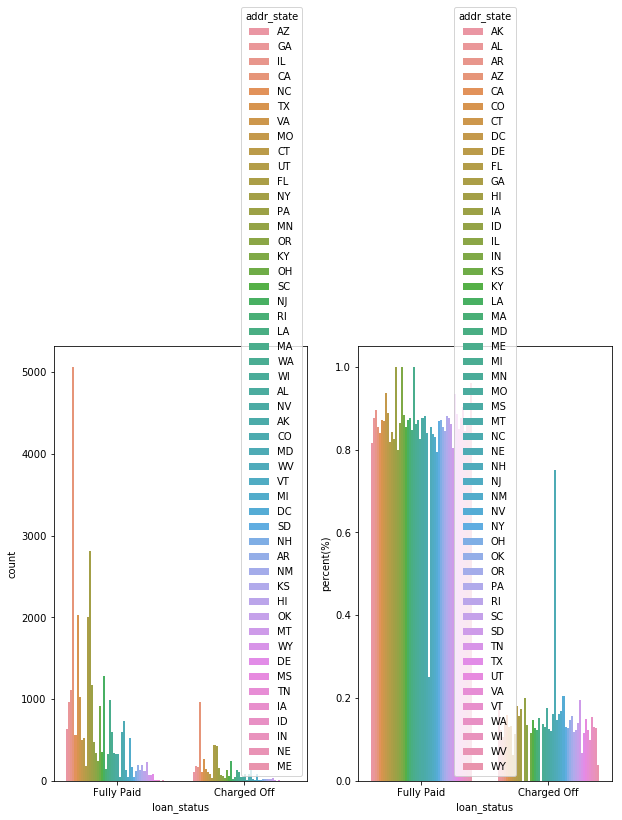

╒════╤══════════════╤═══════════════╤══════════════╤═════════╕
│    │ addr_state   │ loan_status   │   percent(%) │   count │
╞════╪══════════════╪═══════════════╪══════════════╪═════════╡
│  0 │ AK           │ Fully Paid    │    0.816667  │      49 │
├────┼──────────────┼───────────────┼──────────────┼─────────┤
│  1 │ AK           │ Charged Off   │    0.183333  │      11 │
├────┼──────────────┼───────────────┼──────────────┼─────────┤
│  2 │ AL           │ Fully Paid    │    0.87664   │     334 │
├────┼──────────────┼───────────────┼──────────────┼─────────┤
│  3 │ AL           │ Charged Off   │    0.12336   │      47 │
├────┼──────────────┼───────────────┼──────────────┼─────────┤
│  4 │ AR           │ Fully Paid    │    0.894495  │     195 │
├────┼──────────────┼───────────────┼──────────────┼─────────┤
│  5 │ AR           │ Charged Off   │    0.105505  │      23 │
├────┼──────────────┼───────────────┼──────────────┼─────────┤
│  6 │ AZ           │ Fully Paid    │    0.854054  │   

In [116]:
segmented_univariate_categorical("loan_status", "addr_state")

__Inference__

Loans by borrowers from the state 'CA' have higher chance of default.

# <font color='green'>Derived Metrics</font>

The variables annual_inc, int_rate_percent and revol_util_percent all have outliers even after treating them and also are widely spread. It makes sense to categorize them into low, medium and high and then try to analyse their effect on loan status.

3 bins are created for each variable based on the quantiles 0, 0.25, 0.75 and 1.

The obtained dervied metrics are type driven ordinal variables which follow an order but mathematical difference between categories is not meaningful.

In [117]:
loan['annual_inc_category'] = pd.qcut(loan.annual_inc, [0, .25, .75, 1.], labels=['Low','Medium','High'])

loan['int_rate_percent_category'] = pd.qcut(loan.int_rate_percent, [0, .25, .75, 1.], labels=['Low','Medium','High'])

loan['revol_util_percent_category'] = pd.qcut(loan.revol_util_percent, [0, .25, .75, 1.], labels=['Low','Medium','High'])

print(len(loan.columns))

list(loan.columns)

22


['loan_amnt',
 'term',
 'int_rate_percent',
 'grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'loan_status',
 'purpose',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util_percent',
 'pub_rec_bankruptcies',
 'annual_inc_category',
 'int_rate_percent_category',
 'revol_util_percent_category']

In [118]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33659 entries, 0 to 39716
Data columns (total 22 columns):
loan_amnt                      33659 non-null int64
term                           33659 non-null object
int_rate_percent               33659 non-null float64
grade                          33659 non-null object
emp_length                     33659 non-null object
home_ownership                 33659 non-null object
annual_inc                     33659 non-null float64
verification_status            33659 non-null object
loan_status                    33659 non-null object
purpose                        33659 non-null object
addr_state                     33659 non-null object
dti                            33659 non-null float64
delinq_2yrs                    33659 non-null int64
inq_last_6mths                 33659 non-null int64
open_acc                       33659 non-null int64
pub_rec                        33659 non-null int64
revol_bal                      33659 non-null

# <font color='green'>Derived Metric Analysis</font>

## annual_inc_category


Number of unique values => 3




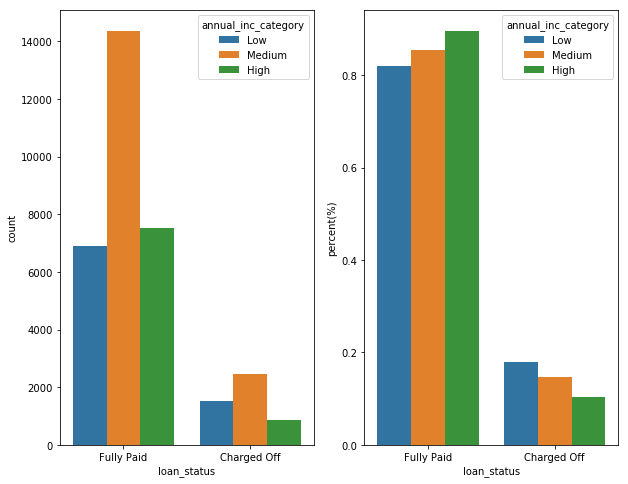

╒════╤═══════════════════════╤═══════════════╤══════════════╤═════════╕
│    │ annual_inc_category   │ loan_status   │   percent(%) │   count │
╞════╪═══════════════════════╪═══════════════╪══════════════╪═════════╡
│  0 │ Low                   │ Fully Paid    │     0.819846 │    6899 │
├────┼───────────────────────┼───────────────┼──────────────┼─────────┤
│  1 │ Low                   │ Charged Off   │     0.180154 │    1516 │
├────┼───────────────────────┼───────────────┼──────────────┼─────────┤
│  2 │ Medium                │ Fully Paid    │     0.854061 │   14373 │
├────┼───────────────────────┼───────────────┼──────────────┼─────────┤
│  3 │ Medium                │ Charged Off   │     0.145939 │    2456 │
├────┼───────────────────────┼───────────────┼──────────────┼─────────┤
│  4 │ High                  │ Fully Paid    │     0.896494 │    7544 │
├────┼───────────────────────┼───────────────┼──────────────┼─────────┤
│  5 │ High                  │ Charged Off   │     0.103506 │   

In [119]:
segmented_univariate_categorical("loan_status", "annual_inc_category")

## int_rate_percent_category


Number of unique values => 3




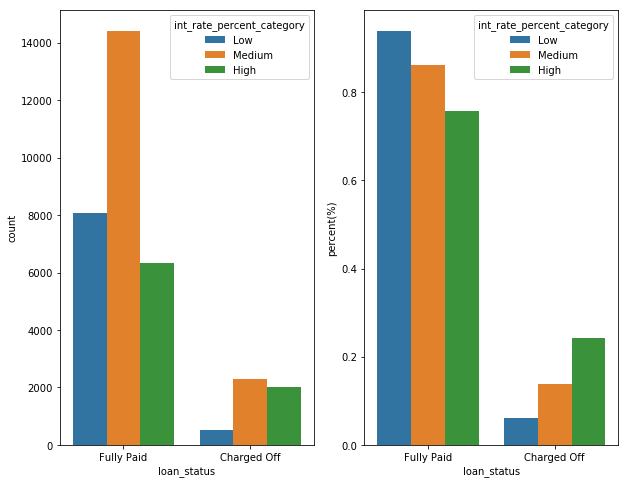

╒════╤═════════════════════════════╤═══════════════╤══════════════╤═════════╕
│    │ int_rate_percent_category   │ loan_status   │   percent(%) │   count │
╞════╪═════════════════════════════╪═══════════════╪══════════════╪═════════╡
│  0 │ Low                         │ Fully Paid    │    0.939874  │    8066 │
├────┼─────────────────────────────┼───────────────┼──────────────┼─────────┤
│  1 │ Low                         │ Charged Off   │    0.0601258 │     516 │
├────┼─────────────────────────────┼───────────────┼──────────────┼─────────┤
│  2 │ Medium                      │ Fully Paid    │    0.862098  │   14416 │
├────┼─────────────────────────────┼───────────────┼──────────────┼─────────┤
│  3 │ Medium                      │ Charged Off   │    0.137902  │    2306 │
├────┼─────────────────────────────┼───────────────┼──────────────┼─────────┤
│  4 │ High                        │ Fully Paid    │    0.758109  │    6334 │
├────┼─────────────────────────────┼───────────────┼────────────

In [120]:
segmented_univariate_categorical("loan_status", "int_rate_percent_category")

## revol_util_percent_category


Number of unique values => 3




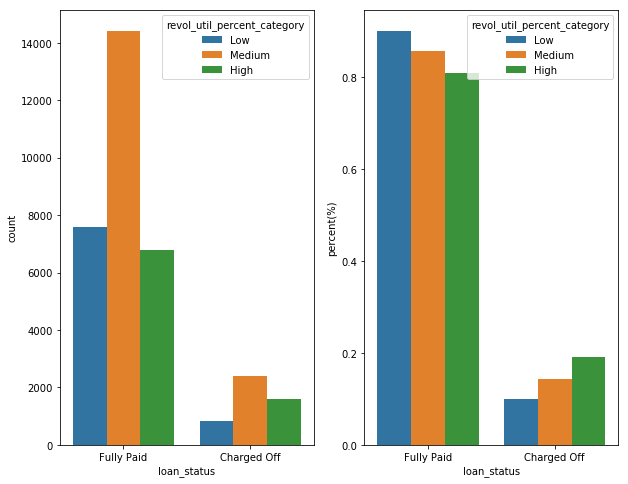

╒════╤═══════════════════════════════╤═══════════════╤══════════════╤═════════╕
│    │ revol_util_percent_category   │ loan_status   │   percent(%) │   count │
╞════╪═══════════════════════════════╪═══════════════╪══════════════╪═════════╡
│  0 │ Low                           │ Fully Paid    │    0.900936  │    7603 │
├────┼───────────────────────────────┼───────────────┼──────────────┼─────────┤
│  1 │ Low                           │ Charged Off   │    0.0990639 │     836 │
├────┼───────────────────────────────┼───────────────┼──────────────┼─────────┤
│  2 │ Medium                        │ Fully Paid    │    0.857585  │   14422 │
├────┼───────────────────────────────┼───────────────┼──────────────┼─────────┤
│  3 │ Medium                        │ Charged Off   │    0.142415  │    2395 │
├────┼───────────────────────────────┼───────────────┼──────────────┼─────────┤
│  4 │ High                          │ Fully Paid    │    0.808164  │    6791 │
├────┼───────────────────────────────┼──

In [121]:
segmented_univariate_categorical("loan_status", "revol_util_percent_category")

__Inference__

None of the derived metrics show significant impact on the loan default.

# <font color='green'>Bivariate Analysis</font>

### Function for bivariate analysis for categorical variables

In [122]:
def bivariate_categorical(x, hue1, hue2):
    
    plt.figure(figsize=(20, 20))

    x, hue1, hue2 = x, hue1, hue2
    y = "count"

    count_loan = loan[x].groupby([loan[hue1],loan[hue2]]).value_counts().rename(y).reset_index()

    y = "percent(%)"

    percent_loan = loan[x].groupby([loan[hue1],loan[hue2]]).value_counts(normalize=True).rename(y).reset_index()

    sns.catplot(x=x, y=y, hue=hue1, col=hue2, data=percent_loan, kind='bar', sharey=False, sharex=False, col_wrap=3)

    plt.show()
    print(tabulate(pd.merge(percent_loan, count_loan, how='inner'), headers='keys', tablefmt='fancy_grid'))

## Correlation Matrix & Heat Map

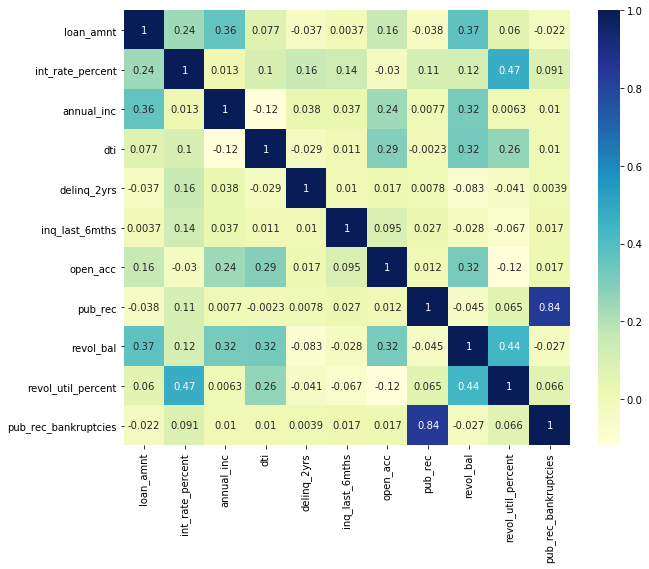

In [123]:
plt.figure(figsize=(10, 8))
sns.heatmap(loan.corr(), cmap="YlGnBu", annot=True)
plt.show()

__Inference__

There is no significant correlation between the variables that we are interested in that helps the analysis.

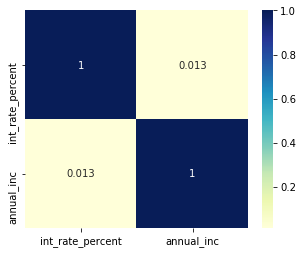

In [124]:
plt.figure(figsize=(5, 4))
sns.heatmap(loan[['int_rate_percent','annual_inc']].corr(), cmap="YlGnBu", annot=True)
plt.show()

## Term by Others

### Grade

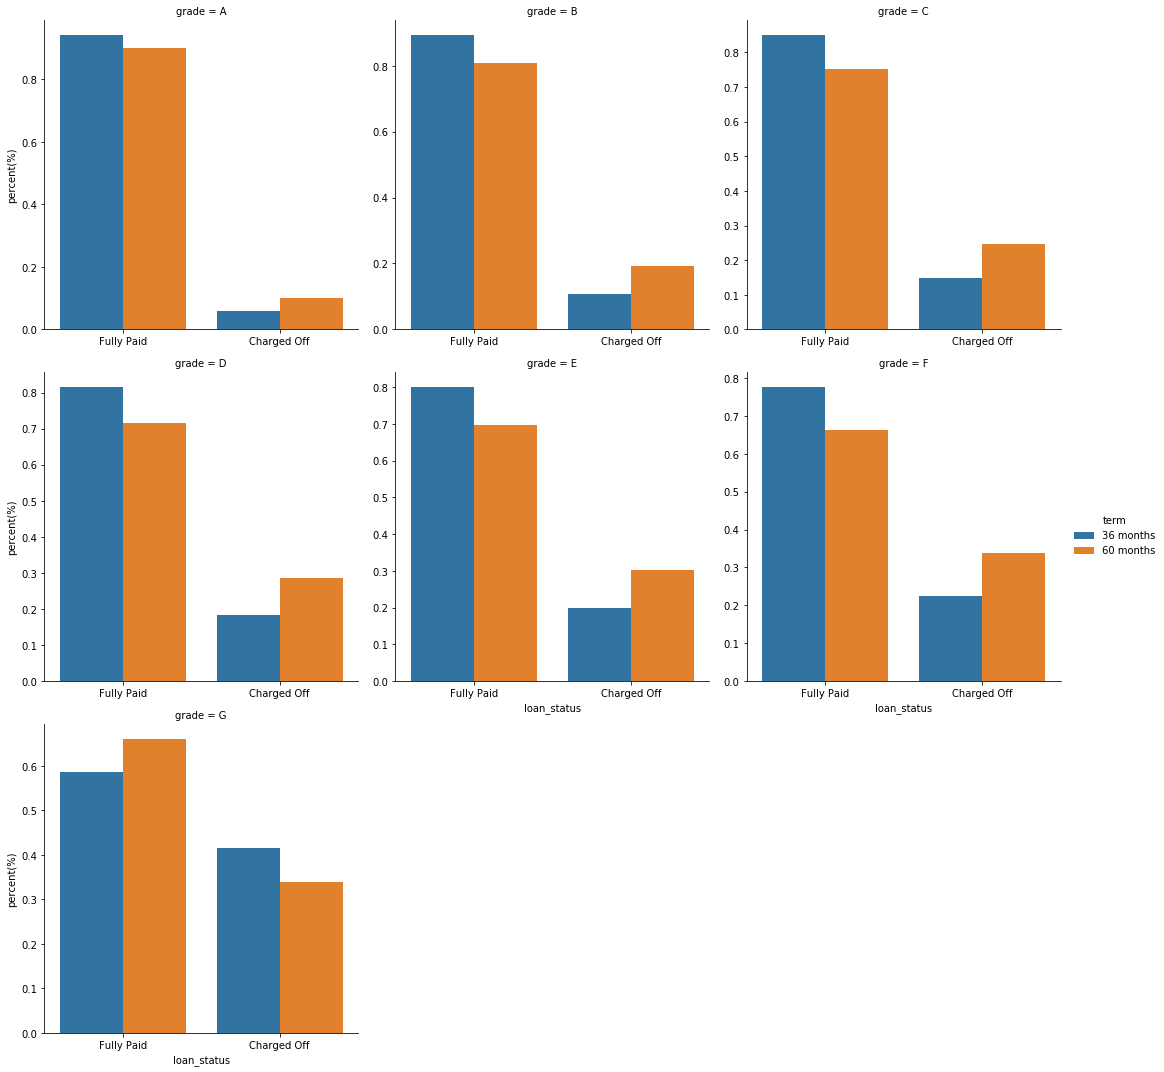

╒════╤═══════════╤═════════╤═══════════════╤══════════════╤═════════╕
│    │ term      │ grade   │ loan_status   │   percent(%) │   count │
╞════╪═══════════╪═════════╪═══════════════╪══════════════╪═════════╡
│  0 │ 36 months │ A       │ Fully Paid    │    0.941055  │    8190 │
├────┼───────────┼─────────┼───────────────┼──────────────┼─────────┤
│  1 │ 36 months │ A       │ Charged Off   │    0.0589452 │     513 │
├────┼───────────┼─────────┼───────────────┼──────────────┼─────────┤
│  2 │ 36 months │ B       │ Fully Paid    │    0.89278   │    7419 │
├────┼───────────┼─────────┼───────────────┼──────────────┼─────────┤
│  3 │ 36 months │ B       │ Charged Off   │    0.10722   │     891 │
├────┼───────────┼─────────┼───────────────┼──────────────┼─────────┤
│  4 │ 36 months │ C       │ Fully Paid    │    0.850086  │    4423 │
├────┼───────────┼─────────┼───────────────┼──────────────┼─────────┤
│  5 │ 36 months │ C       │ Charged Off   │    0.149914  │     780 │
├────┼───────────┼──

In [125]:
bivariate_categorical("loan_status", "term", "grade")

__Inference__

Term 60 months and grades C & D have a higher chance of default:

| Term | Grade | Percent |
| --- | --- | --- |
| 60 Months | C | 24.8 |
| 60 Months | D | 28.57 |

Note => Percent is the percentage of default in the occurence of the corresponding combinations.

### Home Ownership

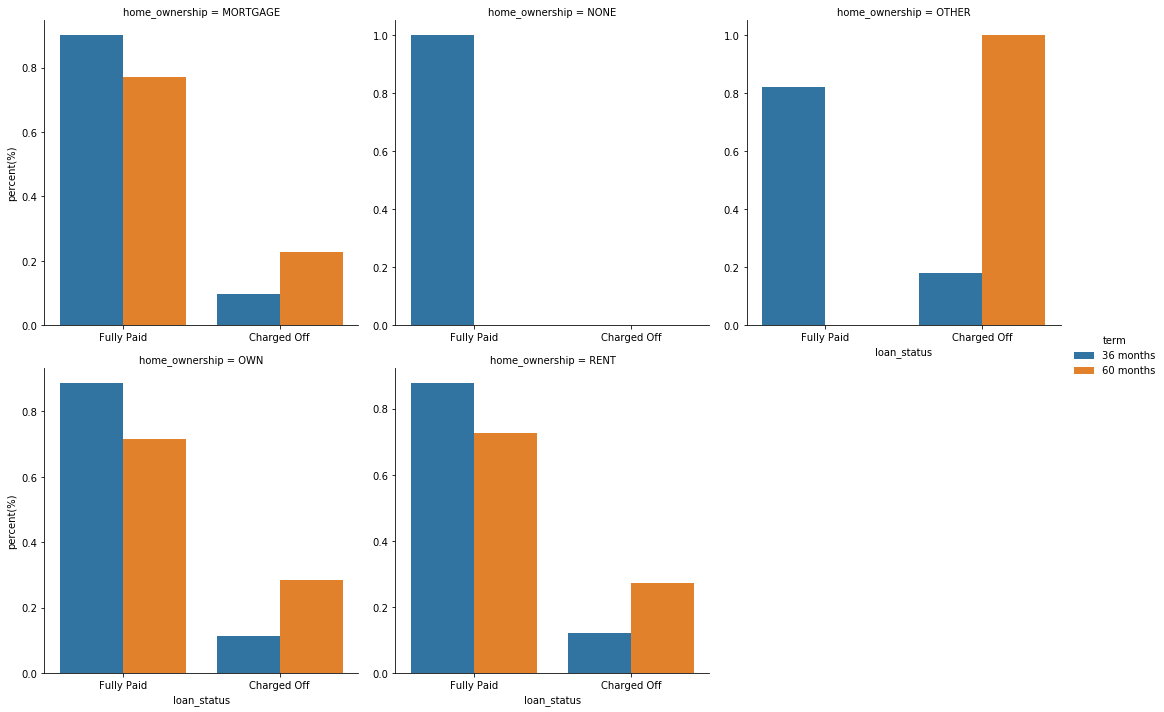

╒════╤═══════════╤══════════════════╤═══════════════╤══════════════╤═════════╕
│    │ term      │ home_ownership   │ loan_status   │   percent(%) │   count │
╞════╪═══════════╪══════════════════╪═══════════════╪══════════════╪═════════╡
│  0 │ 36 months │ MORTGAGE         │ Fully Paid    │    0.901548  │    8855 │
├────┼───────────┼──────────────────┼───────────────┼──────────────┼─────────┤
│  1 │ 36 months │ MORTGAGE         │ Charged Off   │    0.0984525 │     967 │
├────┼───────────┼──────────────────┼───────────────┼──────────────┼─────────┤
│  2 │ 36 months │ NONE             │ Fully Paid    │    1         │       3 │
├────┼───────────┼──────────────────┼───────────────┼──────────────┼─────────┤
│  3 │ 36 months │ OTHER            │ Fully Paid    │    0.820225  │      73 │
├────┼───────────┼──────────────────┼───────────────┼──────────────┼─────────┤
│  4 │ 36 months │ OTHER            │ Charged Off   │    0.179775  │      16 │
├────┼───────────┼──────────────────┼───────────────

In [126]:
bivariate_categorical("loan_status", "term", "home_ownership")

__Inference__

Term 60 months and home ownership categories Rent and Mortgage have a higher chance of default:

| Term | Home Ownership | Percent |
| --- | --- | --- |
| 60 Months | RENT | 27.32 |
| 60 Months | MORTGAGE | 22.48 |

Note => Percent is the percentage of default in the occurence of the corresponding combinations.

### Purpose

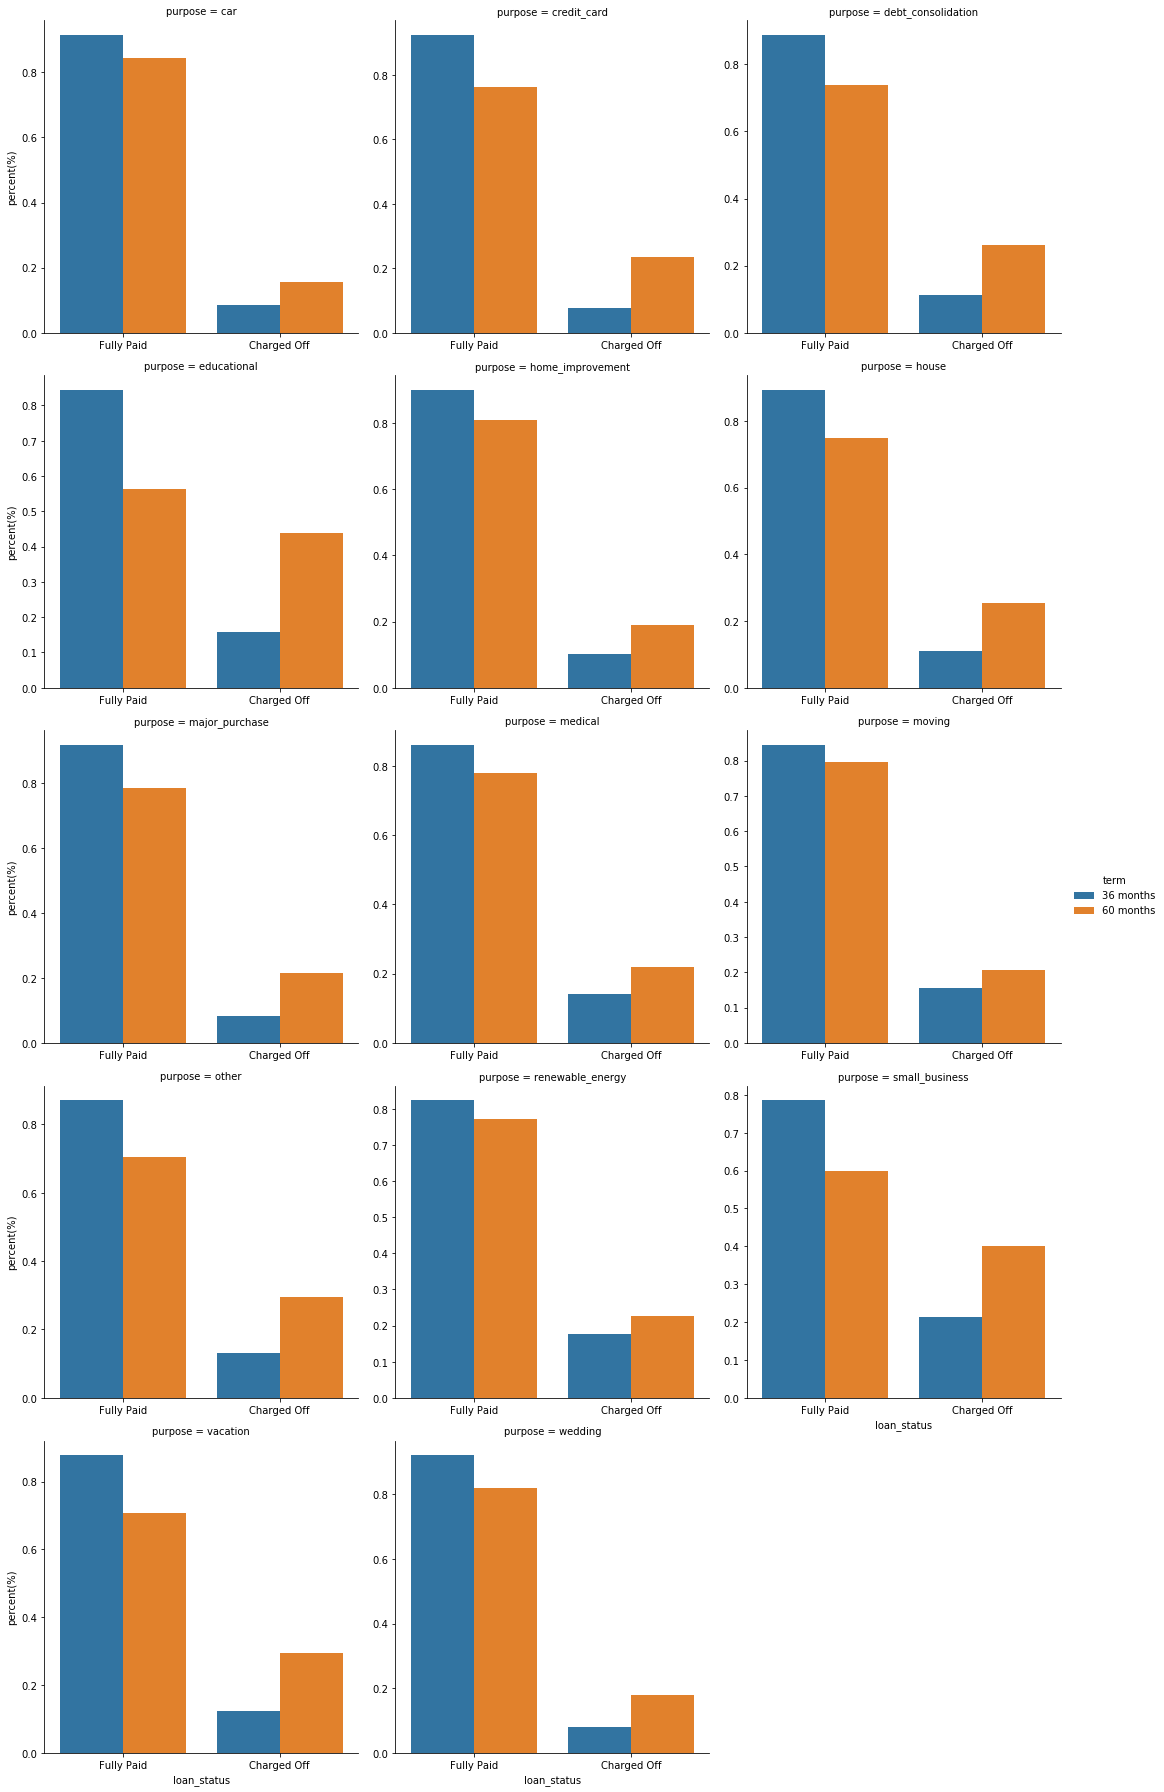

╒════╤═══════════╤════════════════════╤═══════════════╤══════════════╤═════════╕
│    │ term      │ purpose            │ loan_status   │   percent(%) │   count │
╞════╪═══════════╪════════════════════╪═══════════════╪══════════════╪═════════╡
│  0 │ 36 months │ car                │ Fully Paid    │    0.914124  │     809 │
├────┼───────────┼────────────────────┼───────────────┼──────────────┼─────────┤
│  1 │ 36 months │ car                │ Charged Off   │    0.0858757 │      76 │
├────┼───────────┼────────────────────┼───────────────┼──────────────┼─────────┤
│  2 │ 36 months │ credit_card        │ Fully Paid    │    0.923164  │    3268 │
├────┼───────────┼────────────────────┼───────────────┼──────────────┼─────────┤
│  3 │ 36 months │ credit_card        │ Charged Off   │    0.0768362 │     272 │
├────┼───────────┼────────────────────┼───────────────┼──────────────┼─────────┤
│  4 │ 36 months │ debt_consolidation │ Fully Paid    │    0.886657  │   10506 │
├────┼───────────┼──────────

In [127]:
bivariate_categorical("loan_status", "term", "purpose")

__Inference__

Term 60 months and purpose category Debt Consolidation have a higher chance of default:

| Term | Purpose | Percent |
| --- | --- | --- |
| 60 Months | Debt Consolidation | 26.28 |

Note => Percent is the percentage of default in the occurence of the corresponding combinations.

### State

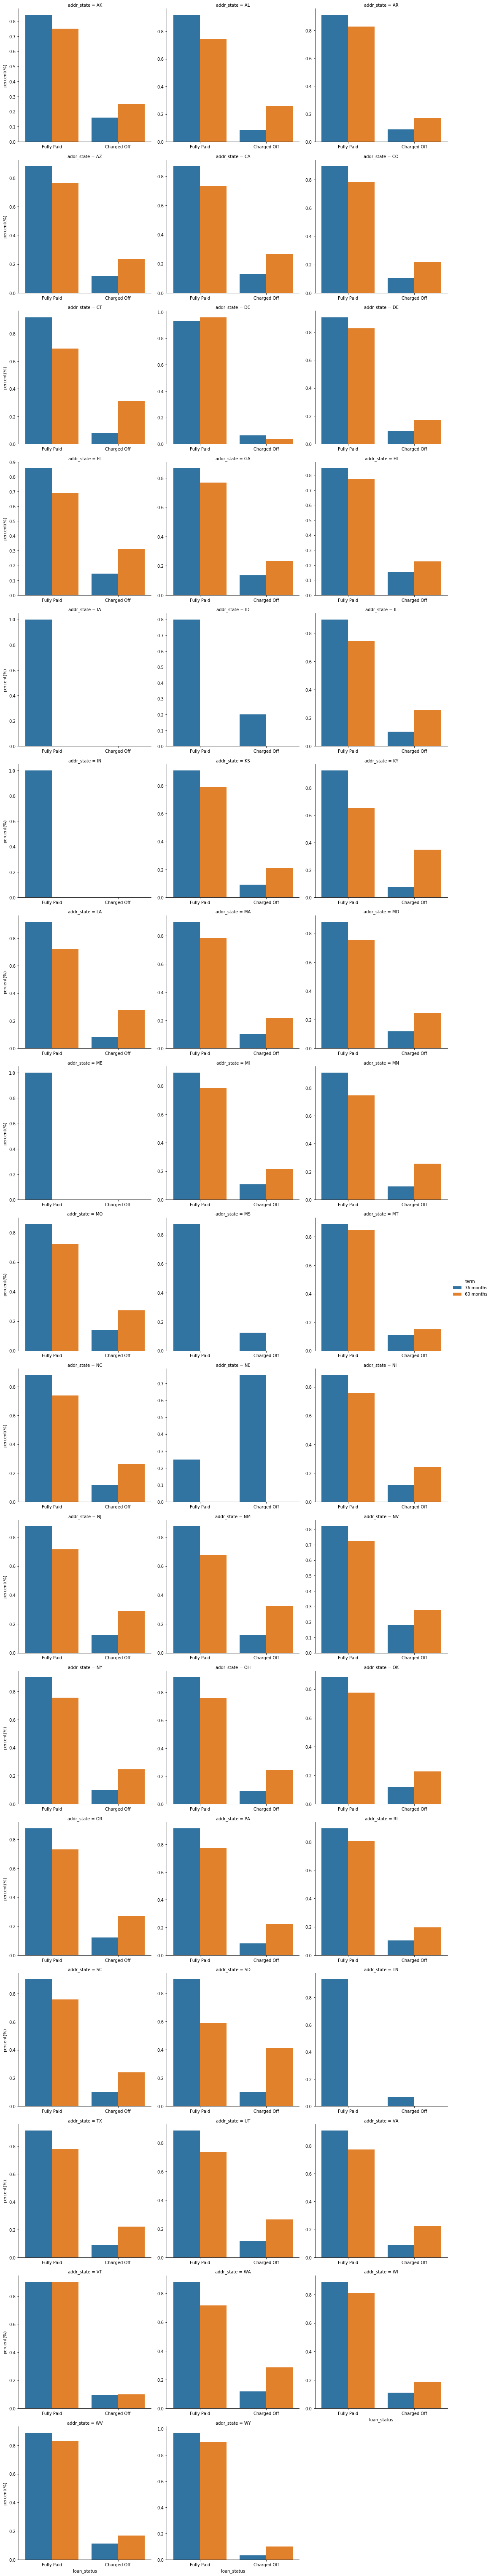

╒═════╤═══════════╤══════════════╤═══════════════╤══════════════╤═════════╕
│     │ term      │ addr_state   │ loan_status   │   percent(%) │   count │
╞═════╪═══════════╪══════════════╪═══════════════╪══════════════╪═════════╡
│   0 │ 36 months │ AK           │ Fully Paid    │    0.840909  │      37 │
├─────┼───────────┼──────────────┼───────────────┼──────────────┼─────────┤
│   1 │ 36 months │ AK           │ Charged Off   │    0.159091  │       7 │
├─────┼───────────┼──────────────┼───────────────┼──────────────┼─────────┤
│   2 │ 36 months │ AL           │ Fully Paid    │    0.917526  │     267 │
├─────┼───────────┼──────────────┼───────────────┼──────────────┼─────────┤
│   3 │ 36 months │ AL           │ Charged Off   │    0.0824742 │      24 │
├─────┼───────────┼──────────────┼───────────────┼──────────────┼─────────┤
│   4 │ 36 months │ AR           │ Fully Paid    │    0.912281  │     156 │
├─────┼───────────┼──────────────┼───────────────┼──────────────┼─────────┤
│   5 │ 36 m

In [128]:
bivariate_categorical("loan_status", "term", "addr_state")

__Inference__

Term 60 months and state CA have a higher chance of default:

| Term | State | Percent |
| --- | --- | --- |
| 60 Months | CA | 26.89 |

Note => Percent is the percentage of default in the occurence of the corresponding combinations.

## Grade by Others

### Home Ownership

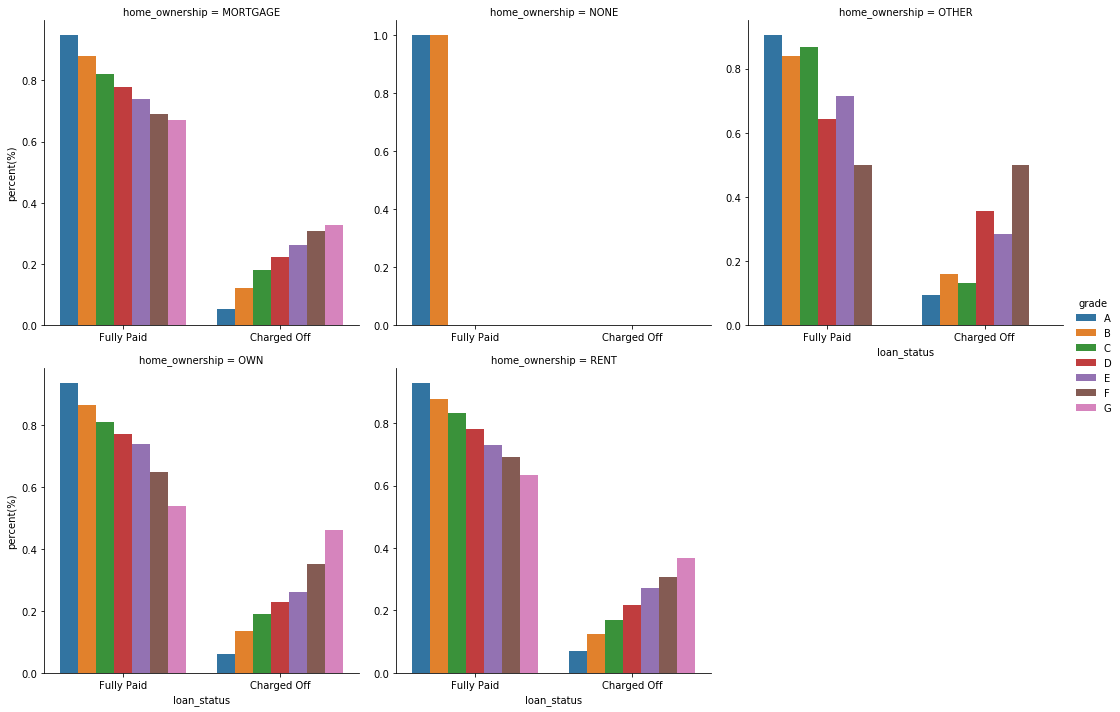

╒════╤═════════╤══════════════════╤═══════════════╤══════════════╤═════════╕
│    │ grade   │ home_ownership   │ loan_status   │   percent(%) │   count │
╞════╪═════════╪══════════════════╪═══════════════╪══════════════╪═════════╡
│  0 │ A       │ MORTGAGE         │ Fully Paid    │    0.948331  │    4148 │
├────┼─────────┼──────────────────┼───────────────┼──────────────┼─────────┤
│  1 │ A       │ MORTGAGE         │ Charged Off   │    0.051669  │     226 │
├────┼─────────┼──────────────────┼───────────────┼──────────────┼─────────┤
│  2 │ A       │ NONE             │ Fully Paid    │    1         │       1 │
├────┼─────────┼──────────────────┼───────────────┼──────────────┼─────────┤
│  3 │ A       │ OTHER            │ Fully Paid    │    0.904762  │      19 │
├────┼─────────┼──────────────────┼───────────────┼──────────────┼─────────┤
│  4 │ A       │ OTHER            │ Charged Off   │    0.0952381 │       2 │
├────┼─────────┼──────────────────┼───────────────┼──────────────┼─────────┤

In [129]:
bivariate_categorical("loan_status", "grade", "home_ownership")

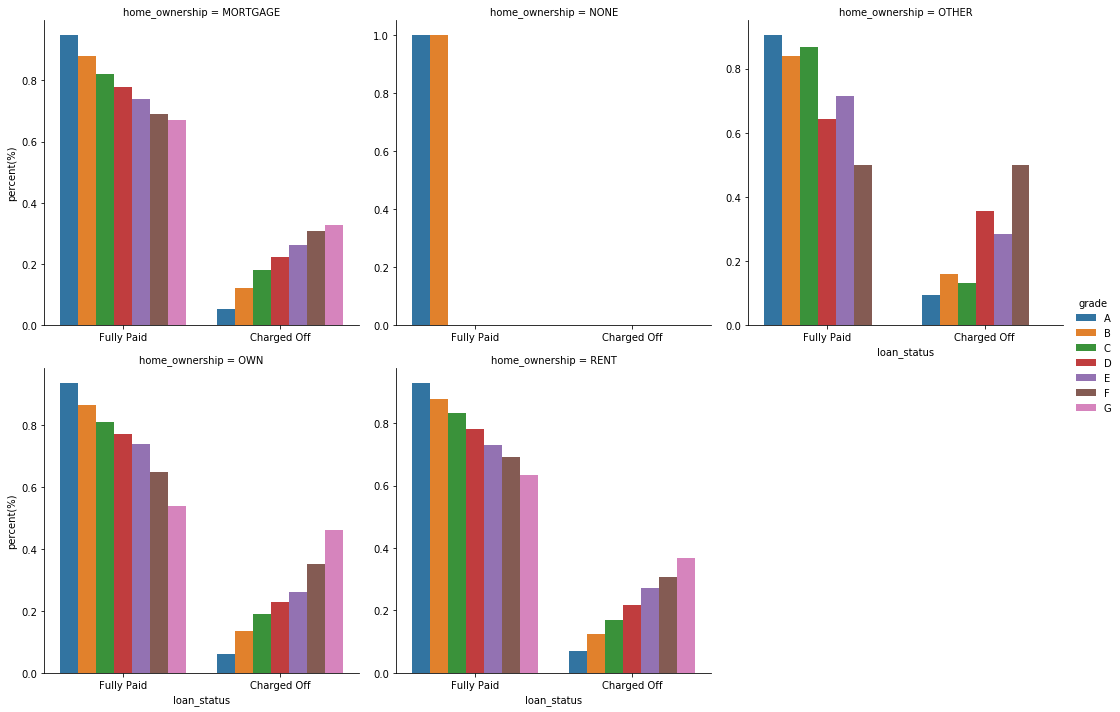

+----+---------+------------------+---------------+--------------+---------+
|    | grade   | home_ownership   | loan_status   |   percent(%) |   count |
|----+---------+------------------+---------------+--------------+---------|
|  0 | A       | MORTGAGE         | Fully Paid    |    0.948331  |    4148 |
|  1 | A       | MORTGAGE         | Charged Off   |    0.051669  |     226 |
|  2 | A       | NONE             | Fully Paid    |    1         |       1 |
|  3 | A       | OTHER            | Fully Paid    |    0.904762  |      19 |
|  4 | A       | OTHER            | Charged Off   |    0.0952381 |       2 |
|  5 | A       | OWN              | Fully Paid    |    0.9375    |     750 |
|  6 | A       | OWN              | Charged Off   |    0.0625    |      50 |
|  7 | A       | RENT             | Fully Paid    |    0.929956  |    3598 |
|  8 | A       | RENT             | Charged Off   |    0.0700439 |     271 |
|  9 | B       | MORTGAGE         | Fully Paid    |    0.878267  |    3528 |

In [130]:
plt.figure(figsize=(20, 20))

x, hue1, hue2 = "loan_status", "grade", "home_ownership"

y = "count"

count_loan = loan[x].groupby([loan[hue1],loan[hue2]]).value_counts().rename(y).reset_index()

y = "percent(%)"

percent_loan = loan[x].groupby([loan[hue1],loan[hue2]]).value_counts(normalize=True).rename(y).reset_index()

sns.catplot(x=x, y=y, hue=hue1, col=hue2, data=percent_loan, kind='bar', sharey=False, sharex=False, col_wrap=3)

plt.show()

print(tabulate(pd.merge(percent_loan, count_loan, how='inner'), headers='keys', tablefmt='psql'))

__Inference__

Grades C & D and home ownership categories Rent and Mortgage have a higher chance of default:

| Grade | Home Ownership | Percent |
| --- | --- | --- |
| C | RENT | 16.92 |
| C | MORTGAGE | 17.92 |
| D | RENT | 21.83 |
| D | MORTGAGE | 22.25 |

Note => Percent is the percentage of default in the occurence of the corresponding combinations.

### Purpose

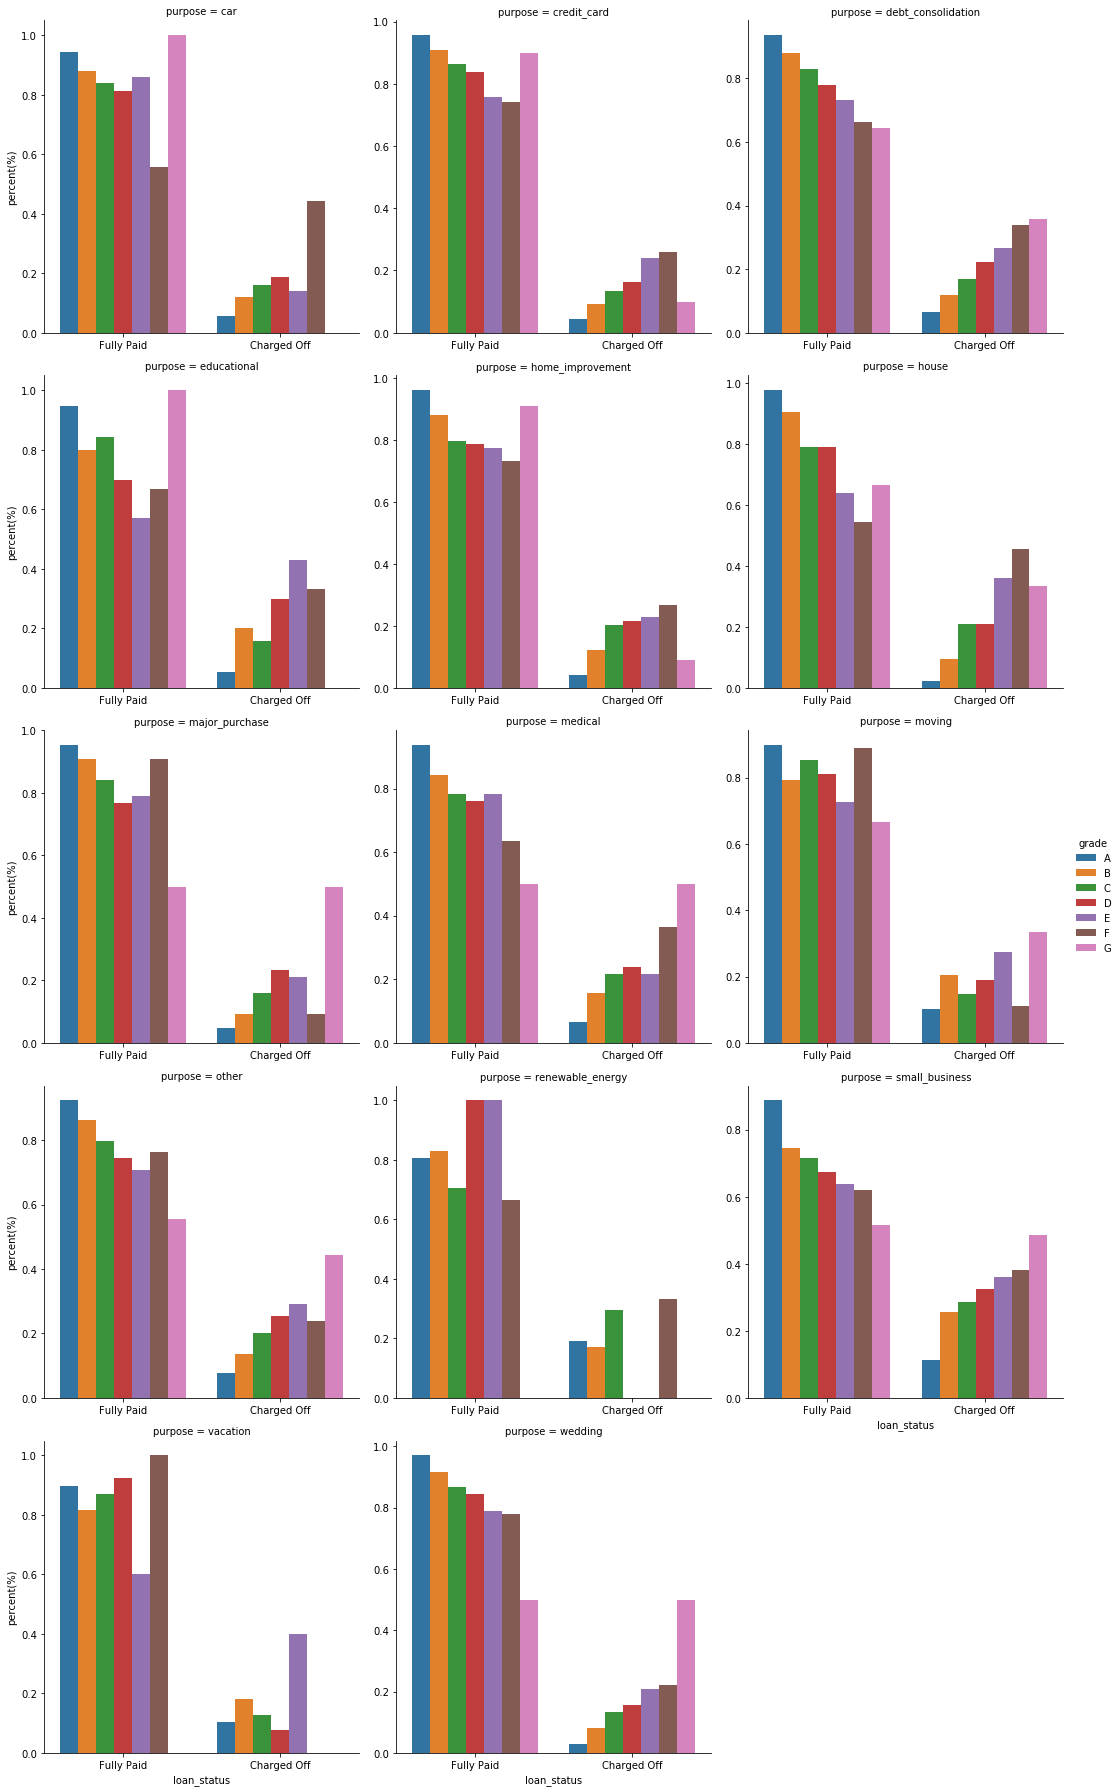

╒═════╤═════════╤════════════════════╤═══════════════╤══════════════╤═════════╕
│     │ grade   │ purpose            │ loan_status   │   percent(%) │   count │
╞═════╪═════════╪════════════════════╪═══════════════╪══════════════╪═════════╡
│   0 │ A       │ car                │ Fully Paid    │    0.944444  │     510 │
├─────┼─────────┼────────────────────┼───────────────┼──────────────┼─────────┤
│   1 │ A       │ car                │ Charged Off   │    0.0555556 │      30 │
├─────┼─────────┼────────────────────┼───────────────┼──────────────┼─────────┤
│   2 │ A       │ credit_card        │ Fully Paid    │    0.955894  │    1192 │
├─────┼─────────┼────────────────────┼───────────────┼──────────────┼─────────┤
│   3 │ A       │ credit_card        │ Charged Off   │    0.0441059 │      55 │
├─────┼─────────┼────────────────────┼───────────────┼──────────────┼─────────┤
│   4 │ A       │ debt_consolidation │ Fully Paid    │    0.935676  │    3302 │
├─────┼─────────┼────────────────────┼──

In [131]:
bivariate_categorical("loan_status", "grade", "purpose")

__Inference__

Grades C & D and purpose Debt Consolidation have a higher chance of default:

| Grade | Purpose | Percent |
| --- | --- | --- |
| C | Debt Consolidation | 17 |
| D | Debt Consolidation | 22.2 |

Note => Percent is the percentage of default in the occurence of the corresponding combinations.

### State

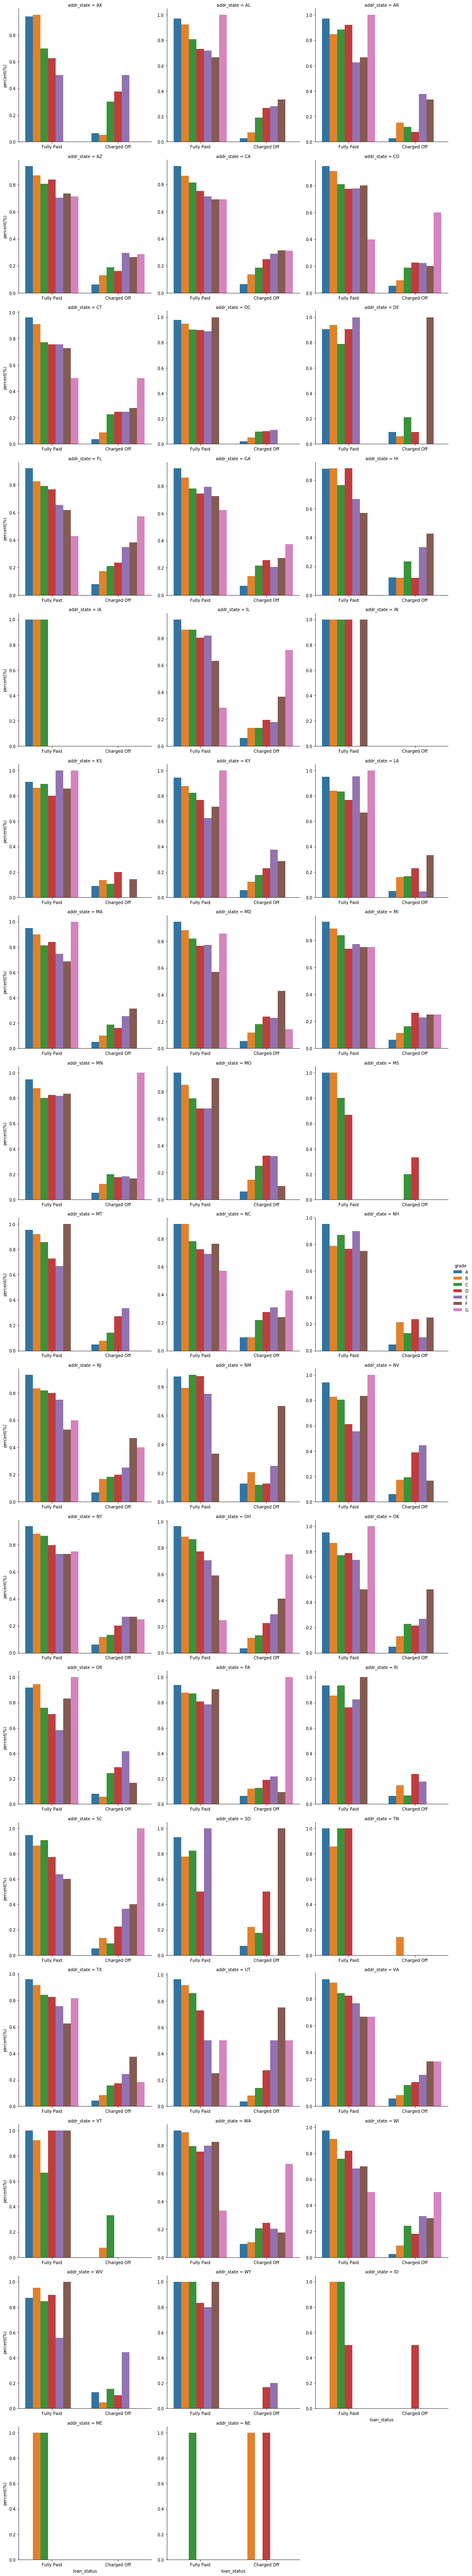

╒═════╤═════════╤══════════════╤═══════════════╤══════════════╤═════════╕
│     │ grade   │ addr_state   │ loan_status   │   percent(%) │   count │
╞═════╪═════════╪══════════════╪═══════════════╪══════════════╪═════════╡
│   0 │ A       │ AK           │ Fully Paid    │    0.9375    │      15 │
├─────┼─────────┼──────────────┼───────────────┼──────────────┼─────────┤
│   1 │ A       │ AK           │ Charged Off   │    0.0625    │       1 │
├─────┼─────────┼──────────────┼───────────────┼──────────────┼─────────┤
│   2 │ A       │ AL           │ Fully Paid    │    0.971963  │     104 │
├─────┼─────────┼──────────────┼───────────────┼──────────────┼─────────┤
│   3 │ A       │ AL           │ Charged Off   │    0.0280374 │       3 │
├─────┼─────────┼──────────────┼───────────────┼──────────────┼─────────┤
│   4 │ A       │ AR           │ Fully Paid    │    0.971831  │      69 │
├─────┼─────────┼──────────────┼───────────────┼──────────────┼─────────┤
│   5 │ A       │ AR           │ Charg

In [132]:
bivariate_categorical("loan_status", "grade", "addr_state")

__Inference__

Grades C & D and state CA have a higher chance of default:

| Grade | State | Percent |
| --- | --- | --- |
| C | CA | 18.54 |
| D | CA | 24.82 |

Note => Percent is the percentage of default in the occurence of the corresponding combinations.

## Home Ownership by Others

### Purpose

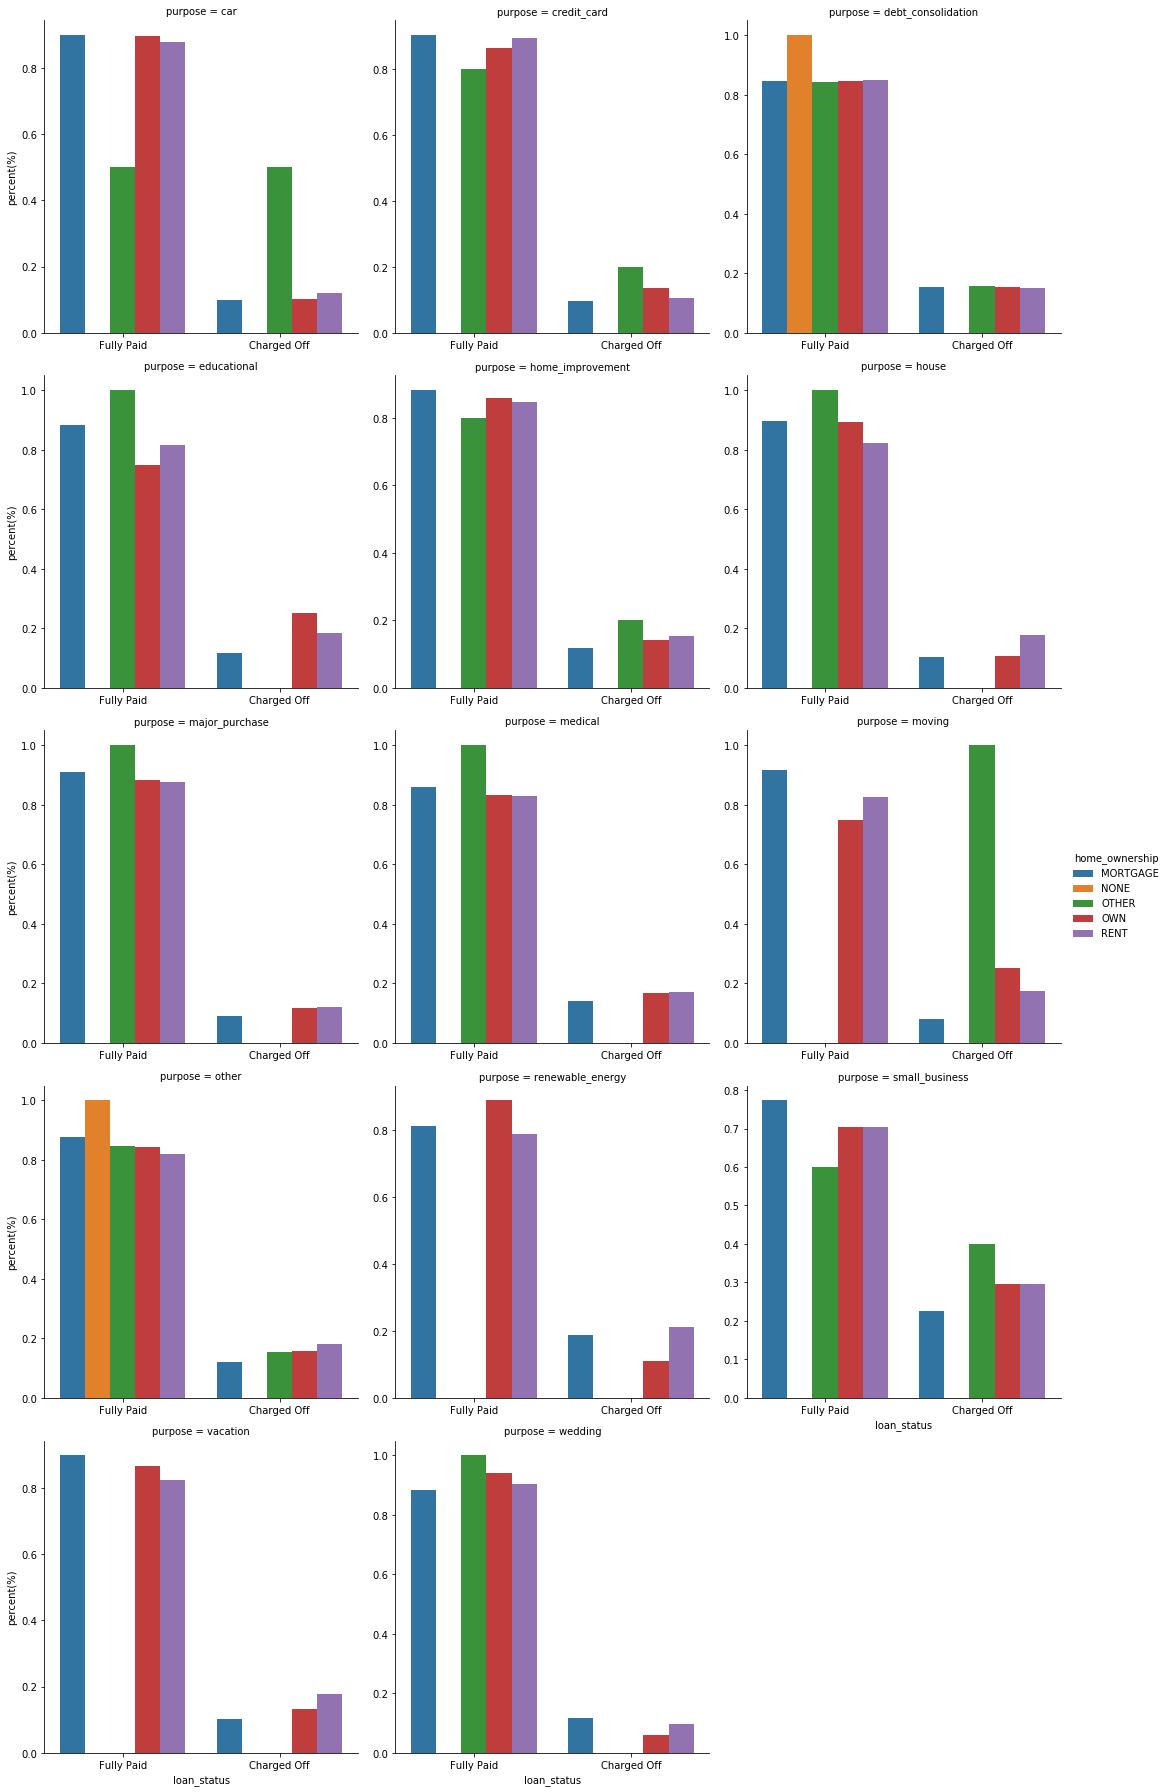

╒═════╤══════════════════╤════════════════════╤═══════════════╤══════════════╤═════════╕
│     │ home_ownership   │ purpose            │ loan_status   │   percent(%) │   count │
╞═════╪══════════════════╪════════════════════╪═══════════════╪══════════════╪═════════╡
│   0 │ MORTGAGE         │ car                │ Fully Paid    │    0.899522  │     564 │
├─────┼──────────────────┼────────────────────┼───────────────┼──────────────┼─────────┤
│   1 │ MORTGAGE         │ car                │ Charged Off   │    0.100478  │      63 │
├─────┼──────────────────┼────────────────────┼───────────────┼──────────────┼─────────┤
│   2 │ MORTGAGE         │ credit_card        │ Fully Paid    │    0.902803  │    1514 │
├─────┼──────────────────┼────────────────────┼───────────────┼──────────────┼─────────┤
│   3 │ MORTGAGE         │ credit_card        │ Charged Off   │    0.0971974 │     163 │
├─────┼──────────────────┼────────────────────┼───────────────┼──────────────┼─────────┤
│   4 │ MORTGAGE     

In [133]:
bivariate_categorical("loan_status", "home_ownership", "purpose")

__Inference__

Home Ownership categories Rent & Mortgage and purpose debt consolidation have a higher chance of default:

| Home Ownership | Purpose | Percent |
| --- | --- | --- |
| Rent | Debt Consolidation | 14.89 |
| Mortgage | Debt Consolidation | 15.33 |

Note => Percent is the percentage of default in the occurence of the corresponding combinations.

### State

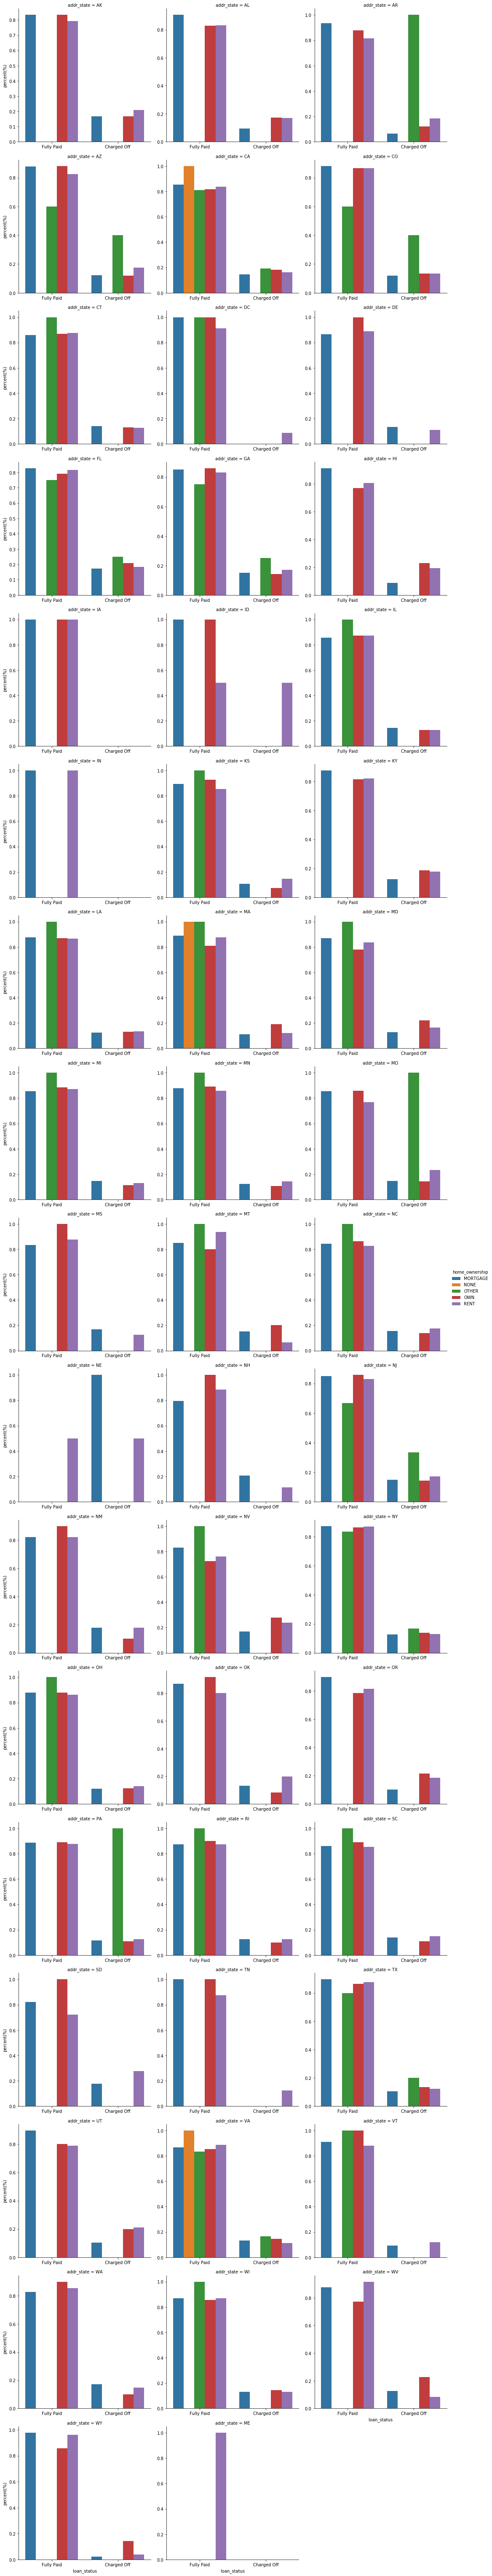

╒═════╤══════════════════╤══════════════╤═══════════════╤══════════════╤═════════╕
│     │ home_ownership   │ addr_state   │ loan_status   │   percent(%) │   count │
╞═════╪══════════════════╪══════════════╪═══════════════╪══════════════╪═════════╡
│   0 │ MORTGAGE         │ AK           │ Fully Paid    │    0.833333  │      25 │
├─────┼──────────────────┼──────────────┼───────────────┼──────────────┼─────────┤
│   1 │ MORTGAGE         │ AK           │ Charged Off   │    0.166667  │       5 │
├─────┼──────────────────┼──────────────┼───────────────┼──────────────┼─────────┤
│   2 │ MORTGAGE         │ AL           │ Fully Paid    │    0.905983  │     212 │
├─────┼──────────────────┼──────────────┼───────────────┼──────────────┼─────────┤
│   3 │ MORTGAGE         │ AL           │ Charged Off   │    0.0940171 │      22 │
├─────┼──────────────────┼──────────────┼───────────────┼──────────────┼─────────┤
│   4 │ MORTGAGE         │ AR           │ Fully Paid    │    0.934783  │     129 │
├───

In [134]:
bivariate_categorical("loan_status", "home_ownership", "addr_state")

__Inference__

Home Ownership categories Rent & Mortgage and State CA have a higher chance of default:

| Home Ownership | State | Percent |
| --- | --- | --- |
| Rent | CA | 16.25 |
| Mortgage | CA | 15.33 |

Note => Percent is the percentage of default in the occurence of the corresponding combinations.

## Purpose by Others

### State

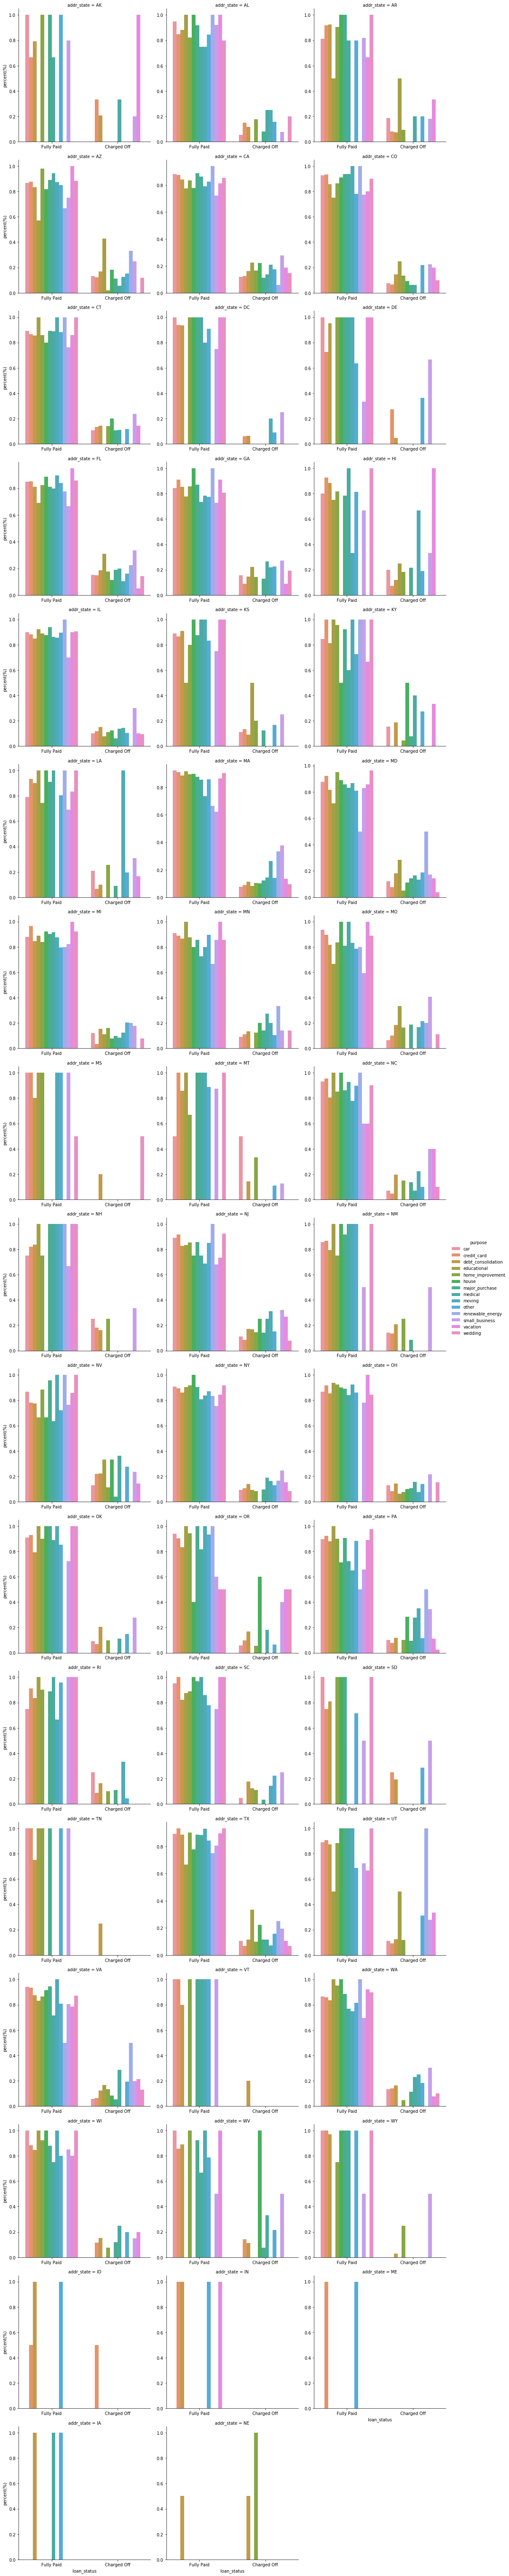

╒══════╤════════════════════╤══════════════╤═══════════════╤══════════════╤═════════╕
│      │ purpose            │ addr_state   │ loan_status   │   percent(%) │   count │
╞══════╪════════════════════╪══════════════╪═══════════════╪══════════════╪═════════╡
│    0 │ car                │ AK           │ Fully Paid    │    1         │       1 │
├──────┼────────────────────┼──────────────┼───────────────┼──────────────┼─────────┤
│    1 │ car                │ AL           │ Fully Paid    │    0.947368  │      18 │
├──────┼────────────────────┼──────────────┼───────────────┼──────────────┼─────────┤
│    2 │ car                │ AL           │ Charged Off   │    0.0526316 │       1 │
├──────┼────────────────────┼──────────────┼───────────────┼──────────────┼─────────┤
│    3 │ car                │ AR           │ Fully Paid    │    0.8125    │      13 │
├──────┼────────────────────┼──────────────┼───────────────┼──────────────┼─────────┤
│    4 │ car                │ AR           │ Charged O

In [135]:
bivariate_categorical("loan_status", "purpose", "addr_state")

__Inference__

Purpose debt consolidation and state CA have a higher chance of default:

| Purpose | State | Percent |
| --- | --- | --- |
| Debt Consolidation | CA | 16.05 |

Note => Percent is the percentage of default in the occurence of the corresponding combinations.

# <font color='green'>Segmented Univariate of Driver Variables</font>

## Term by others

### Grade


Number of unique values => 7




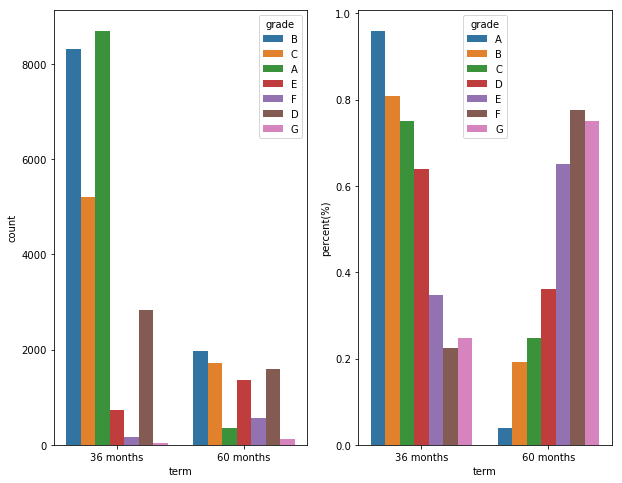

╒════╤═════════╤═══════════╤══════════════╤═════════╕
│    │ grade   │ term      │   percent(%) │   count │
╞════╪═════════╪═══════════╪══════════════╪═════════╡
│  0 │ A       │ 36 months │    0.960066  │    8703 │
├────┼─────────┼───────────┼──────────────┼─────────┤
│  1 │ A       │ 60 months │    0.0399338 │     362 │
├────┼─────────┼───────────┼──────────────┼─────────┤
│  2 │ B       │ 36 months │    0.808366  │    8310 │
├────┼─────────┼───────────┼──────────────┼─────────┤
│  3 │ B       │ 60 months │    0.191634  │    1970 │
├────┼─────────┼───────────┼──────────────┼─────────┤
│  4 │ C       │ 36 months │    0.751336  │    5203 │
├────┼─────────┼───────────┼──────────────┼─────────┤
│  5 │ C       │ 60 months │    0.248664  │    1722 │
├────┼─────────┼───────────┼──────────────┼─────────┤
│  6 │ D       │ 36 months │    0.639566  │    2832 │
├────┼─────────┼───────────┼──────────────┼─────────┤
│  7 │ D       │ 60 months │    0.360434  │    1596 │
├────┼─────────┼───────────┼

In [136]:
segmented_univariate_categorical('term','grade')

__Inference__

Borrowers of grades C & D have substantiate percentages of 60 months loans.

There is an increase in taking 60 months loans as we move from grades A to G. Meaning, lower grade people taking loans of higher tenure.

### Home Ownership


Number of unique values => 5




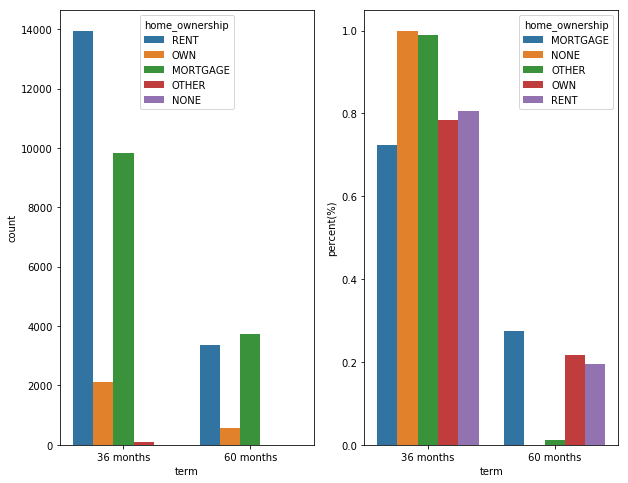

╒════╤══════════════════╤═══════════╤══════════════╤═════════╕
│    │ home_ownership   │ term      │   percent(%) │   count │
╞════╪══════════════════╪═══════════╪══════════════╪═════════╡
│  0 │ MORTGAGE         │ 36 months │    0.724764  │    9822 │
├────┼──────────────────┼───────────┼──────────────┼─────────┤
│  1 │ MORTGAGE         │ 60 months │    0.275236  │    3730 │
├────┼──────────────────┼───────────┼──────────────┼─────────┤
│  2 │ NONE             │ 36 months │    1         │       3 │
├────┼──────────────────┼───────────┼──────────────┼─────────┤
│  3 │ OTHER            │ 36 months │    0.988889  │      89 │
├────┼──────────────────┼───────────┼──────────────┼─────────┤
│  4 │ OTHER            │ 60 months │    0.0111111 │       1 │
├────┼──────────────────┼───────────┼──────────────┼─────────┤
│  5 │ OWN              │ 36 months │    0.783613  │    2104 │
├────┼──────────────────┼───────────┼──────────────┼─────────┤
│  6 │ OWN              │ 60 months │    0.216387  │   

In [137]:
segmented_univariate_categorical('term','home_ownership')

__Inference__

Borrowers who fall under the category of Rent and Mortgage home ownership have substantiate percentages of 60 months loans.

### Purpose


Number of unique values => 14




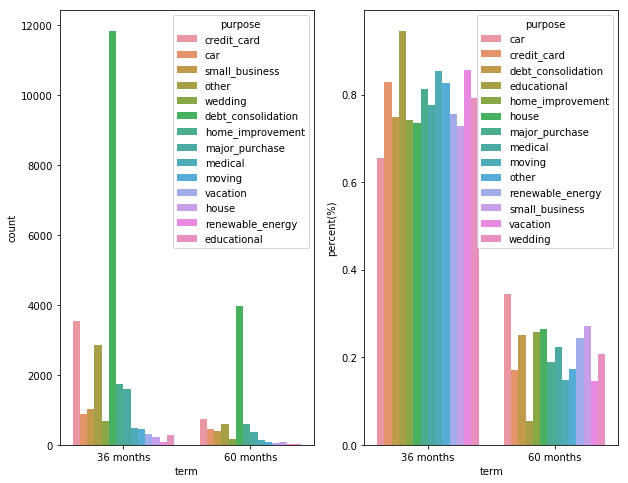

╒════╤════════════════════╤═══════════╤══════════════╤═════════╕
│    │ purpose            │ term      │   percent(%) │   count │
╞════╪════════════════════╪═══════════╪══════════════╪═════════╡
│  0 │ car                │ 36 months │    0.65507   │     885 │
├────┼────────────────────┼───────────┼──────────────┼─────────┤
│  1 │ car                │ 60 months │    0.34493   │     466 │
├────┼────────────────────┼───────────┼──────────────┼─────────┤
│  2 │ credit_card        │ 36 months │    0.828652  │    3540 │
├────┼────────────────────┼───────────┼──────────────┼─────────┤
│  3 │ credit_card        │ 60 months │    0.171348  │     732 │
├────┼────────────────────┼───────────┼──────────────┼─────────┤
│  4 │ debt_consolidation │ 36 months │    0.749083  │   11849 │
├────┼────────────────────┼───────────┼──────────────┼─────────┤
│  5 │ debt_consolidation │ 60 months │    0.250917  │    3969 │
├────┼────────────────────┼───────────┼──────────────┼─────────┤
│  6 │ educational       

In [138]:
segmented_univariate_categorical('term','purpose')

__Inference__

Borrowers whose purpose of taking loan is debt consolidation have substantiate percentages of 60 month loans.

### State


Number of unique values => 50




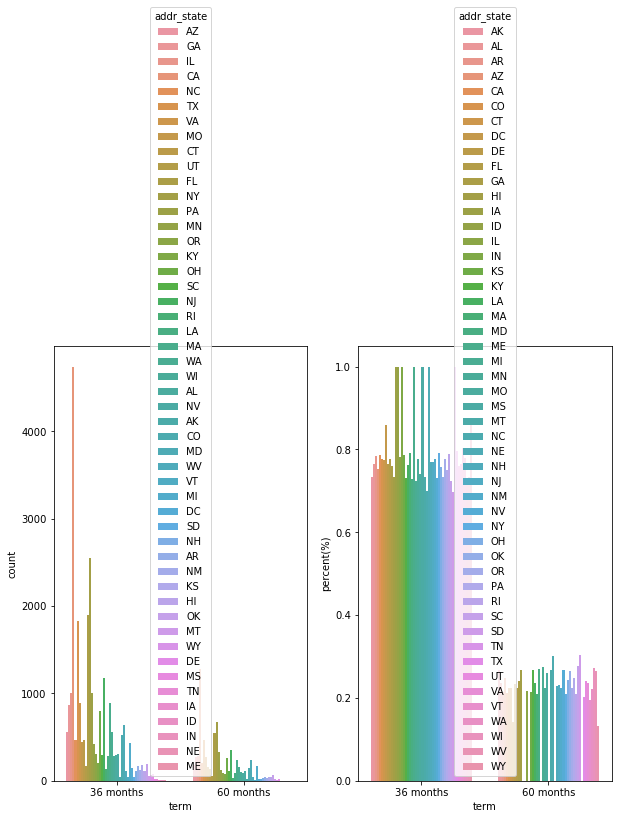

╒════╤══════════════╤═══════════╤══════════════╤═════════╕
│    │ addr_state   │ term      │   percent(%) │   count │
╞════╪══════════════╪═══════════╪══════════════╪═════════╡
│  0 │ AK           │ 36 months │     0.733333 │      44 │
├────┼──────────────┼───────────┼──────────────┼─────────┤
│  1 │ AK           │ 60 months │     0.266667 │      16 │
├────┼──────────────┼───────────┼──────────────┼─────────┤
│  2 │ AL           │ 36 months │     0.76378  │     291 │
├────┼──────────────┼───────────┼──────────────┼─────────┤
│  3 │ AL           │ 60 months │     0.23622  │      90 │
├────┼──────────────┼───────────┼──────────────┼─────────┤
│  4 │ AR           │ 36 months │     0.784404 │     171 │
├────┼──────────────┼───────────┼──────────────┼─────────┤
│  5 │ AR           │ 60 months │     0.215596 │      47 │
├────┼──────────────┼───────────┼──────────────┼─────────┤
│  6 │ AZ           │ 36 months │     0.752703 │     557 │
├────┼──────────────┼───────────┼──────────────┼────────

In [139]:
segmented_univariate_categorical('term','addr_state')

__Inference__

Borrowers who are from CA state have substantiate percentages of 60 month loans.

## Grade by Others

### Home Ownership


Number of unique values => 5




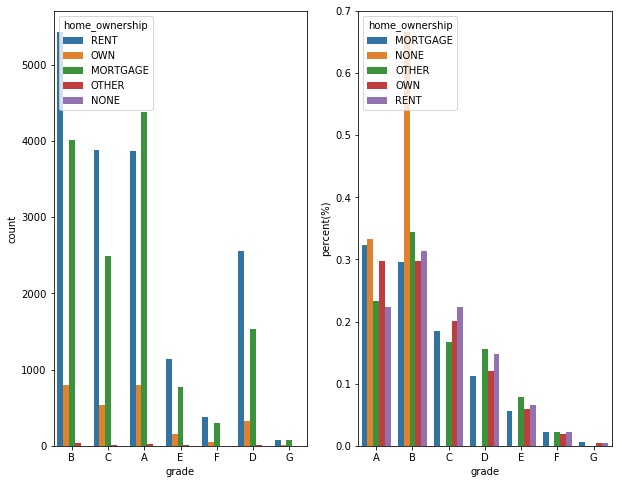

╒════╤══════════════════╤═════════╤══════════════╤═════════╕
│    │ home_ownership   │ grade   │   percent(%) │   count │
╞════╪══════════════════╪═════════╪══════════════╪═════════╡
│  0 │ MORTGAGE         │ A       │   0.322757   │    4374 │
├────┼──────────────────┼─────────┼──────────────┼─────────┤
│  1 │ MORTGAGE         │ B       │   0.296414   │    4017 │
├────┼──────────────────┼─────────┼──────────────┼─────────┤
│  2 │ MORTGAGE         │ C       │   0.184106   │    2495 │
├────┼──────────────────┼─────────┼──────────────┼─────────┤
│  3 │ MORTGAGE         │ D       │   0.112751   │    1528 │
├────┼──────────────────┼─────────┼──────────────┼─────────┤
│  4 │ MORTGAGE         │ E       │   0.0568182  │     770 │
├────┼──────────────────┼─────────┼──────────────┼─────────┤
│  5 │ MORTGAGE         │ F       │   0.021768   │     295 │
├────┼──────────────────┼─────────┼──────────────┼─────────┤
│  6 │ MORTGAGE         │ G       │   0.00538666 │      73 │
├────┼──────────────────

In [140]:
segmented_univariate_categorical('grade','home_ownership')

__Inference__

Borrowers who who live in rented accommodation or whose house is in mortgage for a subtantiate percentage also belong to grade B.

### Purpose


Number of unique values => 14




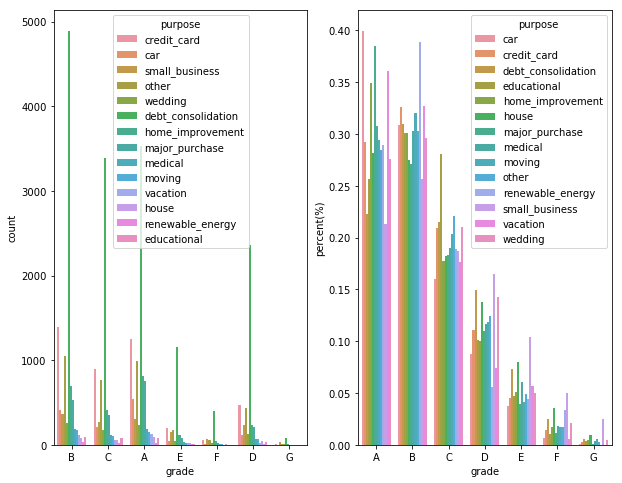

╒════╤════════════════════╤═════════╤══════════════╤═════════╕
│    │ purpose            │ grade   │   percent(%) │   count │
╞════╪════════════════════╪═════════╪══════════════╪═════════╡
│  0 │ car                │ A       │  0.399704    │     540 │
├────┼────────────────────┼─────────┼──────────────┼─────────┤
│  1 │ car                │ B       │  0.30866     │     417 │
├────┼────────────────────┼─────────┼──────────────┼─────────┤
│  2 │ car                │ C       │  0.159882    │     216 │
├────┼────────────────────┼─────────┼──────────────┼─────────┤
│  3 │ car                │ D       │  0.0873427   │     118 │
├────┼────────────────────┼─────────┼──────────────┼─────────┤
│  4 │ car                │ E       │  0.0370096   │      50 │
├────┼────────────────────┼─────────┼──────────────┼─────────┤
│  5 │ car                │ F       │  0.00666173  │       9 │
├────┼────────────────────┼─────────┼──────────────┼─────────┤
│  6 │ car                │ G       │  0.000740192 │   

In [141]:
segmented_univariate_categorical('grade','purpose')

__Inference__

Borrowers who have taken loans for debt consolidation, for a substantiate percentage also belong to grade B.

### State


Number of unique values => 50




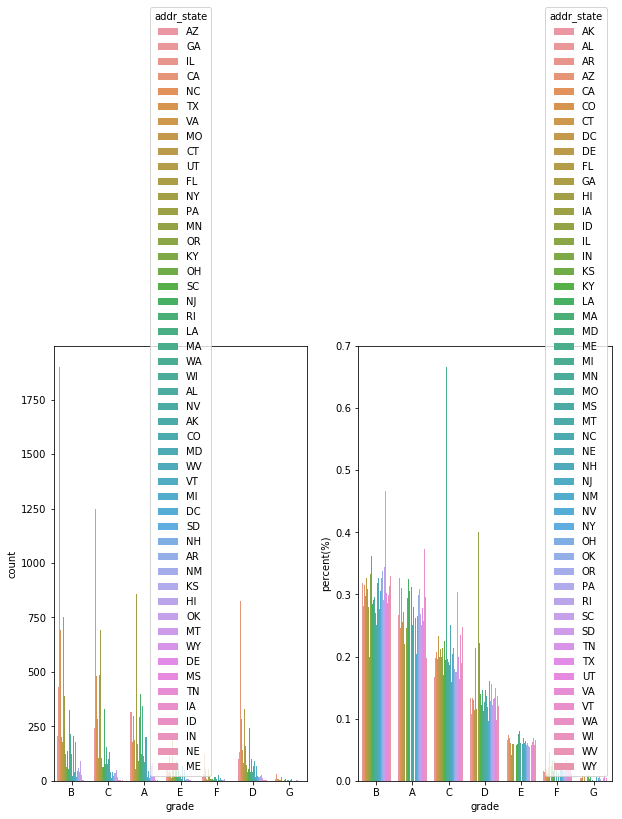

╒═════╤══════════════╤═════════╤══════════════╤═════════╕
│     │ addr_state   │ grade   │   percent(%) │   count │
╞═════╪══════════════╪═════════╪══════════════╪═════════╡
│   0 │ AK           │ B       │   0.333333   │      20 │
├─────┼──────────────┼─────────┼──────────────┼─────────┤
│   1 │ AK           │ A       │   0.266667   │      16 │
├─────┼──────────────┼─────────┼──────────────┼─────────┤
│   2 │ AK           │ C       │   0.166667   │      10 │
├─────┼──────────────┼─────────┼──────────────┼─────────┤
│   3 │ AK           │ D       │   0.133333   │       8 │
├─────┼──────────────┼─────────┼──────────────┼─────────┤
│   4 │ AK           │ E       │   0.1        │       6 │
├─────┼──────────────┼─────────┼──────────────┼─────────┤
│   5 │ AL           │ B       │   0.317585   │     121 │
├─────┼──────────────┼─────────┼──────────────┼─────────┤
│   6 │ AL           │ A       │   0.28084    │     107 │
├─────┼──────────────┼─────────┼──────────────┼─────────┤
│   7 │ AL    

In [142]:
segmented_univariate_categorical('grade','addr_state')

__Inference__

Borrowers from state CA, for a substantiate percentage also belong to grade B.

# Export for analysis in Tableau

In [143]:
from pandas import ExcelWriter
from pandas import ExcelFile

writer = ExcelWriter('/Users/sdittaka/Downloads/loan_final.xlsx', engine='xlsxwriter', options={'strings_to_urls': False})

loan.to_excel(writer,'Sheet1')

writer.save()